# Exploratory Data Analysis (non text data)

## Imports Block

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency

## Import Cleaned Data

In [2]:
clean_data = pd.read_csv('../data/cleaned_data.csv')

clean_data.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,name_processed,assumed_gender,total_of_host_listings_count
0,879181,287172,Central Area,Atlantic,47.60096,-122.30190,Private room,53,30,99,0.80,247,4,jimi hendrix neighborhood 3,female,2
1,6606,14942,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99,30,159,0.95,99,2,fab privat seattl urban cottag,female,3
2,902609,3264544,Delridge,Highland Park,47.52383,-122.35287,Entire home/apt,70,2,238,1.95,206,27,entir guest suit inest seattl,male,5
3,9419,30559,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,55,2,175,1.14,356,20,gloriou sun room memori foamb,male,9
4,226536,209571,Magnolia,Lawton Park,47.66133,-122.40088,Private room,61,1,316,2.28,209,53,seren room sunni cottag near discoveri park,female,1


## Initial Clean Data Exploration

### Check that we still have no null values

In [3]:
clean_data.isnull().sum()

id                              0
host_id                         0
neighbourhood_group             0
neighbourhood                   0
latitude                        0
longitude                       0
room_type                       0
price                           0
minimum_nights                  0
number_of_reviews               0
reviews_per_month               0
availability_365                0
number_of_reviews_ltm           0
name_processed                  0
assumed_gender                  0
total_of_host_listings_count    0
dtype: int64

### Look at values in different column

In [4]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4917 entries, 0 to 4916
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            4917 non-null   int64  
 1   host_id                       4917 non-null   int64  
 2   neighbourhood_group           4917 non-null   object 
 3   neighbourhood                 4917 non-null   object 
 4   latitude                      4917 non-null   float64
 5   longitude                     4917 non-null   float64
 6   room_type                     4917 non-null   object 
 7   price                         4917 non-null   int64  
 8   minimum_nights                4917 non-null   int64  
 9   number_of_reviews             4917 non-null   int64  
 10  reviews_per_month             4917 non-null   float64
 11  availability_365              4917 non-null   int64  
 12  number_of_reviews_ltm         4917 non-null   int64  
 13  nam

## Data Visualization & Analysis for Categorical Columns

**Note:** 'name_processed' is a text data variable and will be looked at in a different file called EDA_text_data.

#### Neighbourhood Columns

In [5]:
clean_data['neighbourhood_group'].unique()

array(['Central Area', 'Other neighborhoods', 'Delridge', 'Magnolia',
       'Beacon Hill', 'West Seattle', 'Ballard', 'Queen Anne',
       'Capitol Hill', 'Downtown', 'Cascade', 'Rainier Valley',
       'Seward Park', 'University District', 'Northgate', 'Interbay',
       'Lake City'], dtype=object)

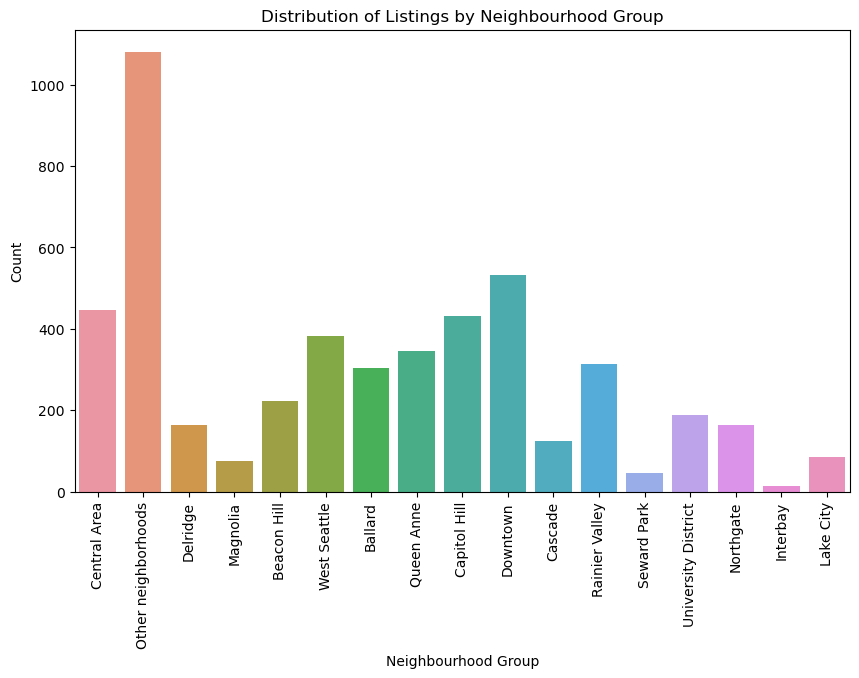

In [6]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'neighbourhood_group', data = clean_data)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Distribution of Listings by Neighbourhood Group')
plt.xticks(rotation = 90)
plt.show()

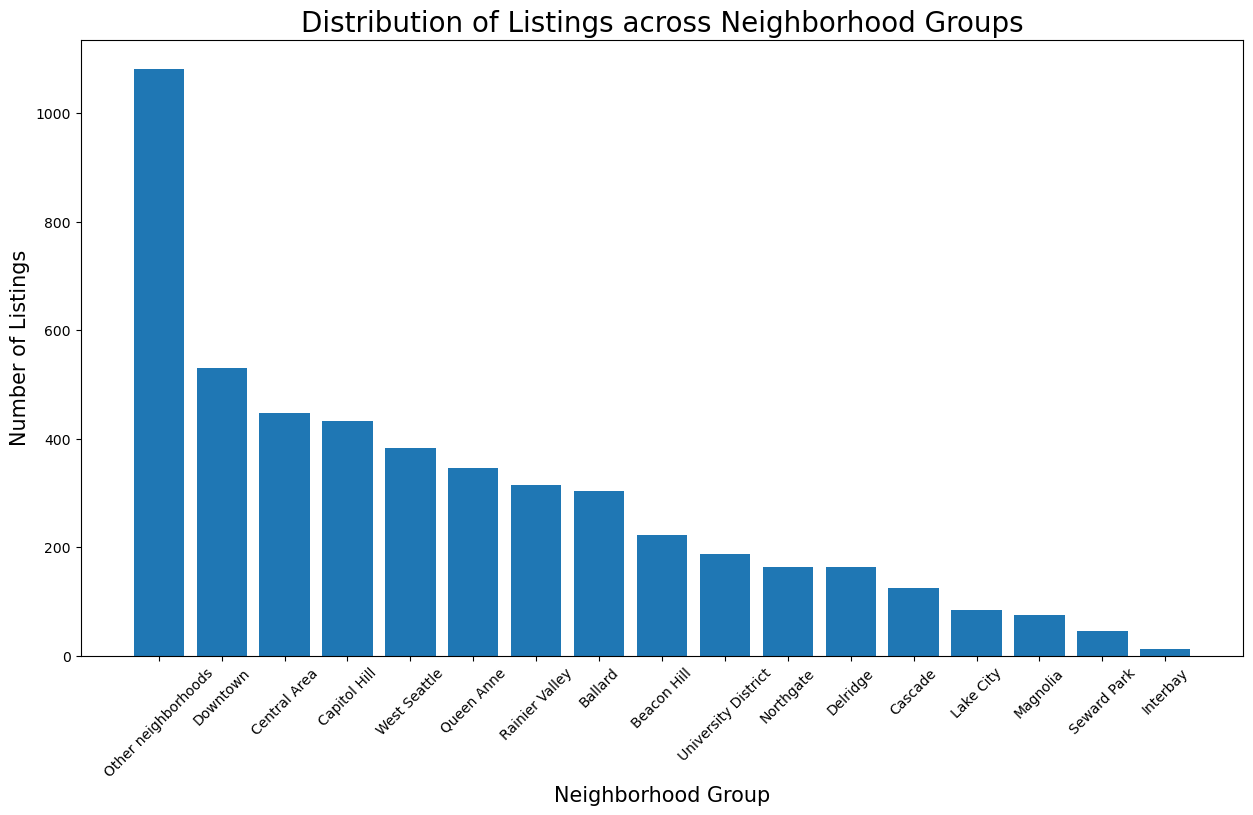

In [7]:
# Visualization of 'neighborhood_group' column via bar chart
neighborhood_groups_count = clean_data['neighbourhood_group'].value_counts()

plt.figure(figsize = (15, 8))
plt.bar(neighborhood_groups_count.index, neighborhood_groups_count.values)
plt.xlabel('Neighborhood Group', size = 15)
plt.ylabel('Number of Listings', size = 15)
plt.title('Distribution of Listings across Neighborhood Groups', size = 20)
plt.xticks(rotation = 45)
plt.show()

In [8]:
clean_data['neighbourhood'].unique()

array(['Atlantic', 'Wallingford', 'Highland Park', 'Georgetown',
       'Lawton Park', 'Mid-Beacon Hill', 'Fairmount Park',
       'West Woodland', 'Alki', 'North Queen Anne', 'West Queen Anne',
       'Greenwood', 'Whittier Heights', 'Broadway', 'First Hill',
       'Eastlake', 'Fremont', 'Green Lake', 'Portage Bay',
       'Lower Queen Anne', 'North Admiral', 'Crown Hill',
       'International District', 'Phinney Ridge', 'North Beacon Hill',
       'Columbia City', 'East Queen Anne', 'Madison Park', 'Mount Baker',
       'Leschi', 'Mann', 'Fauntleroy', 'Genesee',
       'Central Business District', 'Seward Park', 'Ravenna',
       'University District', 'Broadview', 'Harrison/Denny-Blaine',
       'Maple Leaf', 'South Delridge', 'Adams', 'Bitter Lake', 'Brighton',
       'Interbay', 'Belltown', 'Madrona', 'Loyal Heights', 'View Ridge',
       'Pioneer Square', 'Stevens', 'High Point', 'Gatewood',
       'Haller Lake', 'North Delridge', 'Pike-Market', 'Laurelhurst',
       'Rainier B

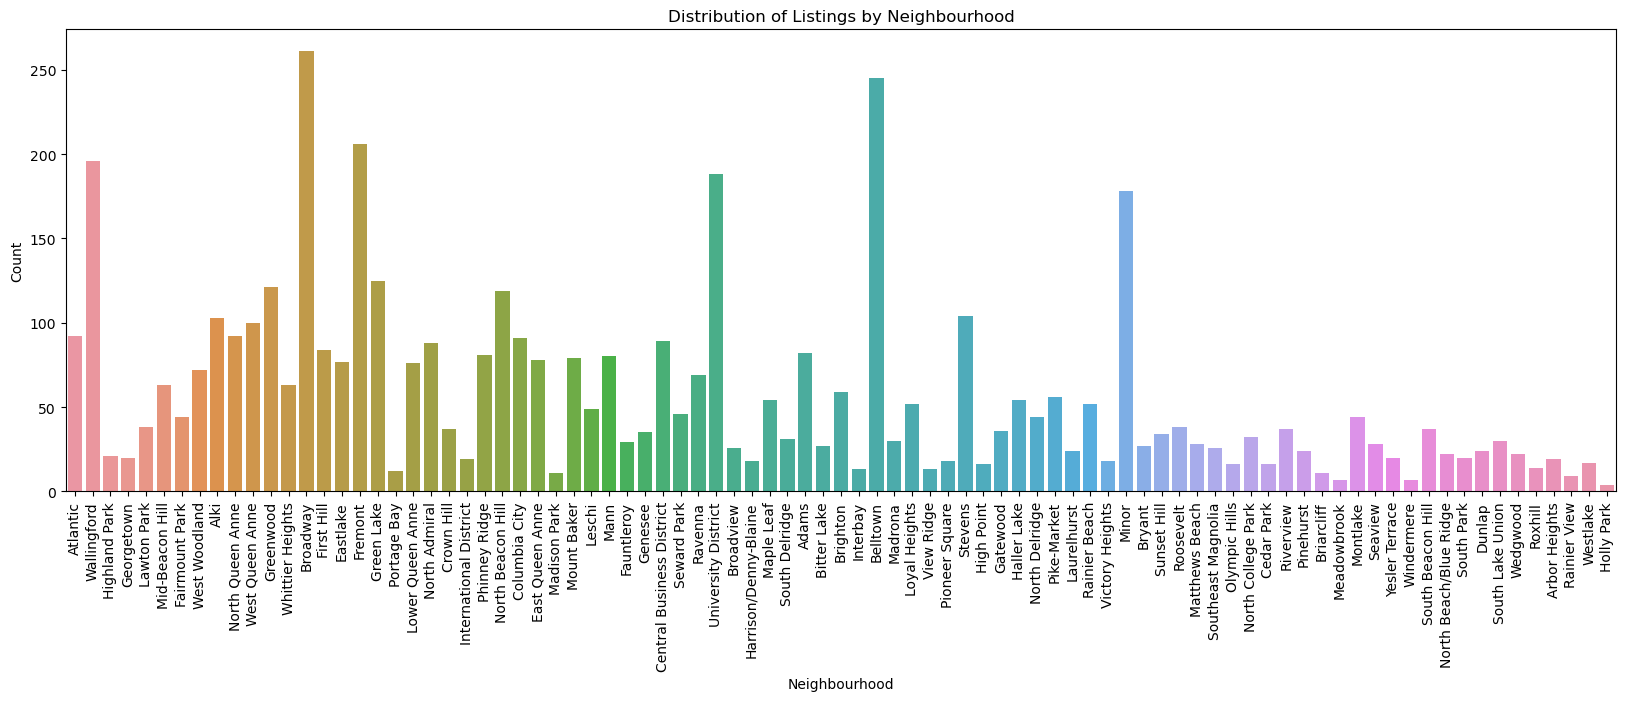

In [9]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'neighbourhood', data = clean_data)
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Distribution of Listings by Neighbourhood')
plt.xticks(rotation = 90)
plt.show()

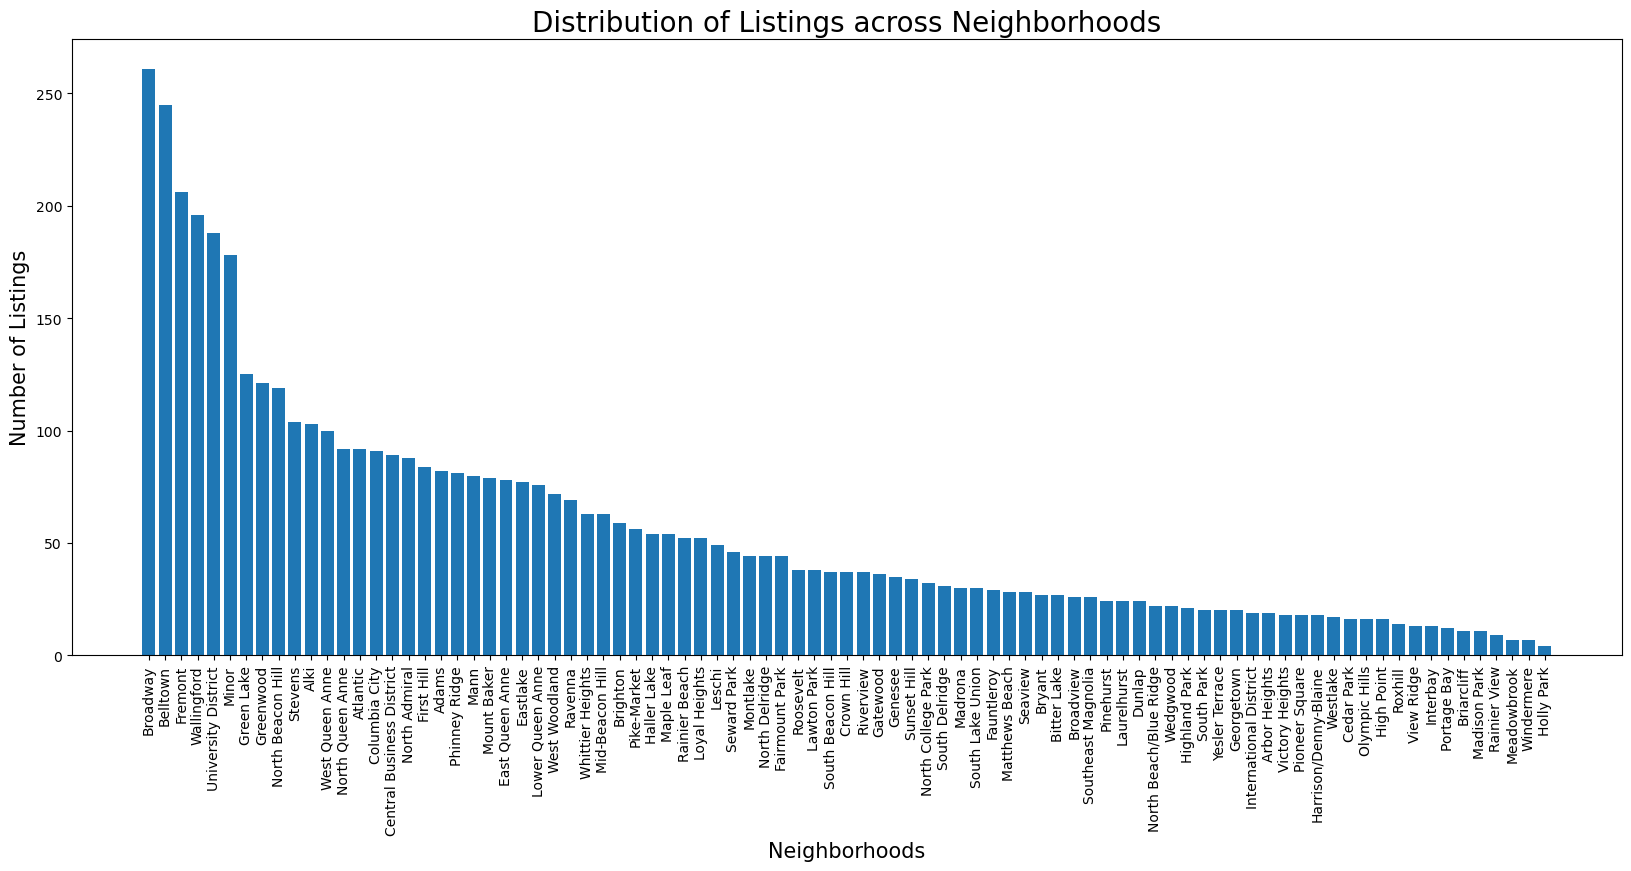

In [10]:
# Visualization of 'neighborhood' column via bar chart
neighborhood_count = clean_data['neighbourhood'].value_counts()

plt.figure(figsize = (20, 8))
plt.bar(neighborhood_count.index, neighborhood_count.values)
plt.xlabel('Neighborhoods', size = 15)
plt.ylabel('Number of Listings', size = 15)
plt.title('Distribution of Listings across Neighborhoods', size = 20)
plt.xticks(rotation = 90)
plt.show()

In [11]:
# Create a contingency table
contingency_table = pd.crosstab(clean_data['neighbourhood_group'], clean_data['neighbourhood'])

# Perform chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square test results:")
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square test results:
Chi-square statistic: 78672.0
p-value: 0.0


**Note:** Based on the chi-square test results, there is a statistically significant association between the 'neighbourhood_group' and 'neighbourhood' variables. The chi-square statistic value of 78672.0 indicates a strong association between the two variables. The p-value of 0.0 suggests that the observed association is unlikely to occur by chance alone. Therefore, the choice of 'neighbourhood_group' is not independent of the 'neighbourhood', indicating that these variables provide distinct information and are not redundant.


So, keep 'neighbourhood_group' and 'neighbourhood' for modeling.

#### Accomodation Type

In [12]:
clean_data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

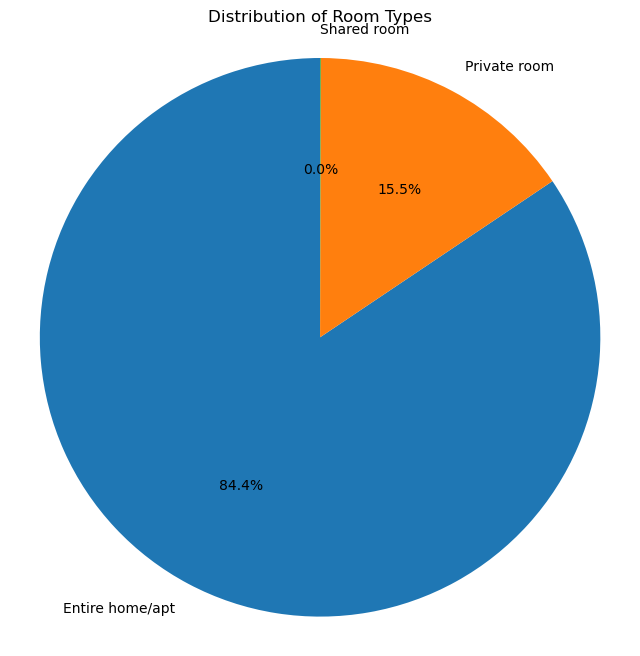

In [13]:
room_type_counts = clean_data['room_type'].value_counts()
plt.figure(figsize = (8, 8))
plt.pie(room_type_counts, labels = room_type_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Distribution of Room Types')
plt.axis('equal')
plt.show()

**Note:** In analyzing the distribution of room types, we observe that shared rooms account for 0.0% of the listings, while private rooms represent 15.5% and entire home/apartment listings make up the majority at 84.4%.

This indicates that the majority of listings in the dataset are entire homes/apartments, followed by private rooms, while shared rooms have a negligible presence. It suggests that most hosts prefer to offer guests the entire space or a private room rather than a shared accommodation option.

Moreover, I plan to make a modification to the 'room_type' column. I intend to assign the value 1 for 'Private room', 2 for 'Entire home/apt', and 3 for 'Shared room'. This transformation will facilitate the analysis and interpretation of the 'room_type' variable in the predictive models.

#### Assumed Gender

In [14]:
clean_data['assumed_gender'].unique()

array(['female', 'male'], dtype=object)

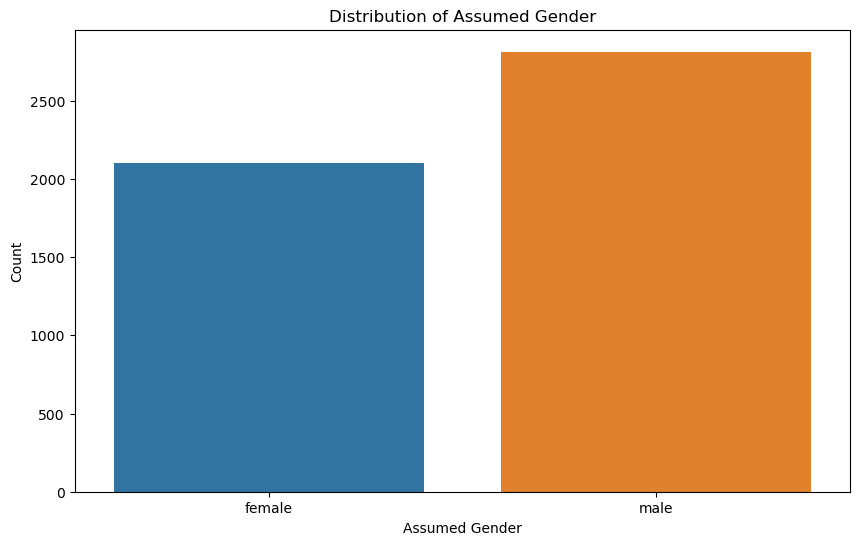

In [15]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'assumed_gender', data = clean_data)
plt.xlabel('Assumed Gender')
plt.ylabel('Count')
plt.title('Distribution of Assumed Gender')
plt.show()

**Note:** Based on the analysis of the plot, it is observed that the dataset contains a higher number of assumed males compared to assumed females. However, it is important to note that the assumed gender is based on the names and may not accurately reflect the true gender of the hosts. Therefore, further investigation and verification are necessary to validate the accuracy of the assumed gender.

In order to address potential biases and enhance the modeling process, a plan is in place to transform the assumed gender column. Specifically, the values will be modified to represent 'female' as 1 and 'male' as 0. This approach aims to standardize the gender representation and minimize any potential confounding effects related to the assumed gender variable during the modeling process.

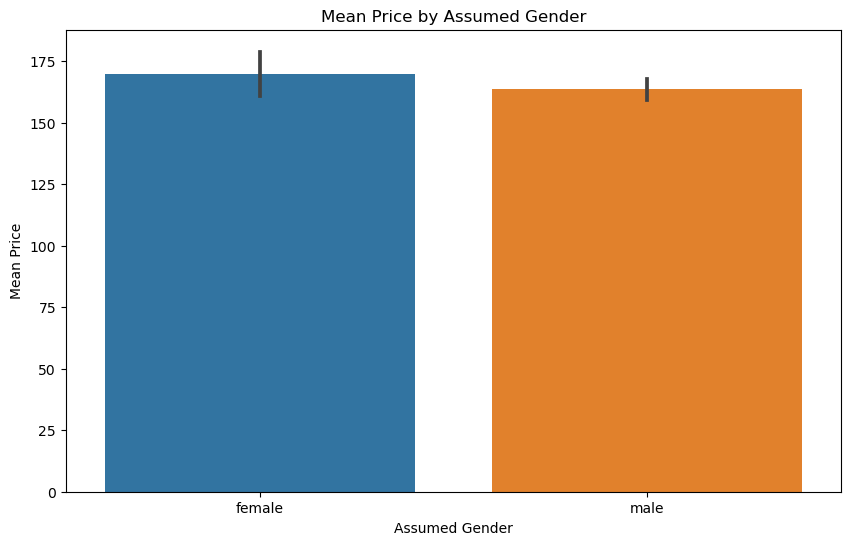

In [16]:
# investigate: relationship between 'assumed_gender' and 'price'
plt.figure(figsize = (10, 6))
sns.barplot(x = 'assumed_gender', y = 'price', data = clean_data)
plt.xlabel('Assumed Gender')
plt.ylabel('Mean Price')
plt.title('Mean Price by Assumed Gender')
plt.show()

**Note:** In the analysis of the relationship between 'assumed_gender' and 'price', a bar plot was created to compare the mean price across different assumed gender categories. The plot reveals that the mean price for females appears to be slightly higher than that for males by approximately $10. However, it is important to note that this difference may not be statistically significant and further statistical tests would be required to confirm its significance.

In [17]:
male_prices = clean_data[clean_data['assumed_gender'] == 'male']['price']
female_prices = clean_data[clean_data['assumed_gender'] == 'female']['price']

if len(male_prices) == 0 or len(female_prices) == 0:
    print("Insufficient data for comparison.")
else:
    t_statistic, p_value = stats.ttest_ind(male_prices, female_prices, equal_var = True)

    print("Independent t-test results:")
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)

    u_statistic, p_value = stats.mannwhitneyu(male_prices, female_prices, alternative = 'two-sided')

    print("\nMann-Whitney U test results:")
    print("U-statistic:", u_statistic)
    print("p-value:", p_value)

Independent t-test results:
t-statistic: -1.2452895692049775
p-value: 0.2130846934265741

Mann-Whitney U test results:
U-statistic: 3079734.0
p-value: 0.01415835114552281


**Note:** Independent t-test results:
The t-statistic value of -1.245 and the p-value of 0.213 suggest that there is no significant difference in prices between the assumed gender groups. The p-value is greater than the typical significance level of 0.05, indicating that the difference observed in mean prices between males and females could be due to chance.

Mann-Whitney U test results:
The U-statistic value of 3079734.0 and the p-value of 0.014 suggest a significant difference in prices between the assumed gender groups. The p-value is less than the typical significance level of 0.05, indicating that the difference observed in prices between males and females is unlikely to be due to chance. However, it's important to note that the Mann-Whitney U test does not provide information about the direction of the difference.

In conclusion, while the t-test did not find a significant difference in mean prices, the Mann-Whitney U test suggests that there is a significant difference in prices between the assumed gender groups. This discrepancy may be due to the different assumptions and statistical properties of the two tests. Further analysis and consideration of other factors are recommended to gain a deeper understanding of the relationship between assumed gender and price.

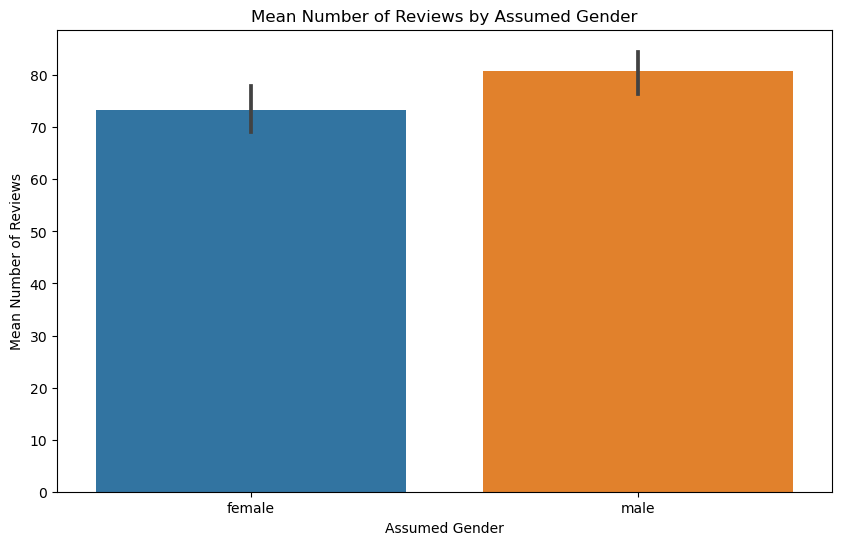

In [18]:
# investigare: relationship between 'assumed_gender' and 'number_of_reviews'
plt.figure(figsize = (10, 6))
sns.barplot(x = 'assumed_gender', y = 'number_of_reviews', data = clean_data)
plt.xlabel('Assumed Gender')
plt.ylabel('Mean Number of Reviews')
plt.title('Mean Number of Reviews by Assumed Gender')
plt.show()

**Note:** Based on the analysis of the plot, it is observed that the bar representing the assumed male gender is approximately 5 points taller than the bar representing the assumed female gender. This suggests that, on average, properties associated with assumed male hosts tend to have a slightly higher number of reviews compared to those associated with assumed female hosts. However, it is important to note that this difference may not be statistically significant, and further analysis is required to determine the significance and potential underlying factors contributing to this observation.

In [19]:
male_reviews = clean_data[clean_data['assumed_gender'] == 'male']['number_of_reviews']
female_reviews = clean_data[clean_data['assumed_gender'] == 'female']['number_of_reviews']

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(male_reviews, female_reviews, alternative = 'two-sided')

print("\nMann-Whitney U test results:")
print("U-statistic:", u_statistic)
print("p-value:", p_value)


Mann-Whitney U test results:
U-statistic: 3117035.5
p-value: 0.001320484779813001


**Note:** Based on the Mann-Whitney U test results, there is evidence of a statistically significant difference in the mean number of reviews between the assumed male and female hosts. The U-statistic is 3117035.5, and the p-value is 0.001320484779813001.

This suggests that the difference in the mean number of reviews observed between assumed male and female hosts is unlikely to have occurred by chance alone. It indicates that there may be a genuine difference in the number of reviews received based on the assumed gender.

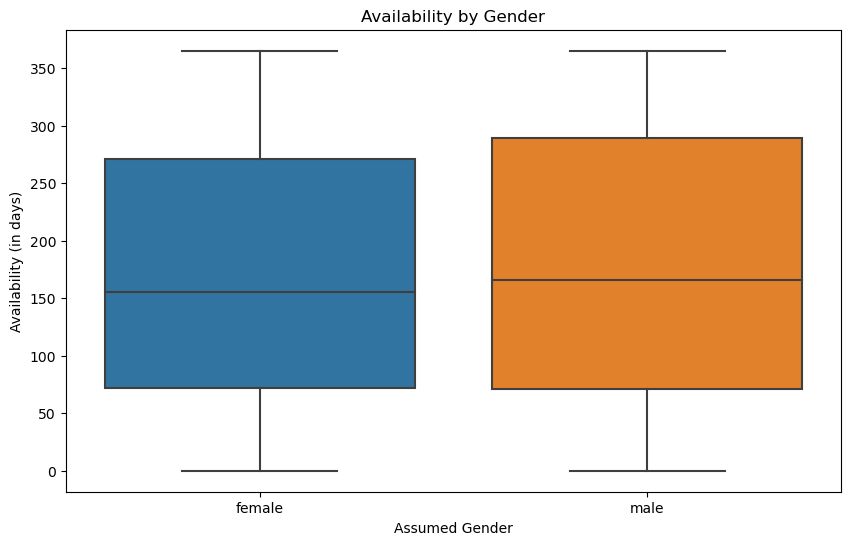

In [20]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'assumed_gender', y = 'availability_365', data = clean_data)
plt.xlabel('Assumed Gender')
plt.ylabel('Availability (in days)')
plt.title('Availability by Gender')
plt.show()

In [21]:
# Split the data into male and female groups
male_availability = clean_data[clean_data['assumed_gender'] == 'male']['availability_365']
female_availability = clean_data[clean_data['assumed_gender'] == 'female']['availability_365']

# Perform Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(male_availability, female_availability, alternative = 'two-sided')

print("Mann-Whitney U test results:")
print("U-statistic:", u_statistic)
print("p-value:", p_value)

Mann-Whitney U test results:
U-statistic: 3019722.5
p-value: 0.21691193282358223


**Note:** Based on the Mann-Whitney U test results, there is no significant difference in availability-365 between males and females. The U-statistic is 3019722.5, with a p-value of 0.217, which is greater than the typical significance level of 0.05. Therefore, we fail to reject the null hypothesis, suggesting that there is no statistically significant difference in the availability-365 between males and females.

Regarding the box plot visualization, if there are no dots for both genders, it suggests that the data points for availability_365 are within the whiskers of the box plot. This indicates that the majority of the data falls within a similar range for both genders, with no significant outliers. However, the difference in box sizes suggests that there might be some variation in availability_365 between genders.

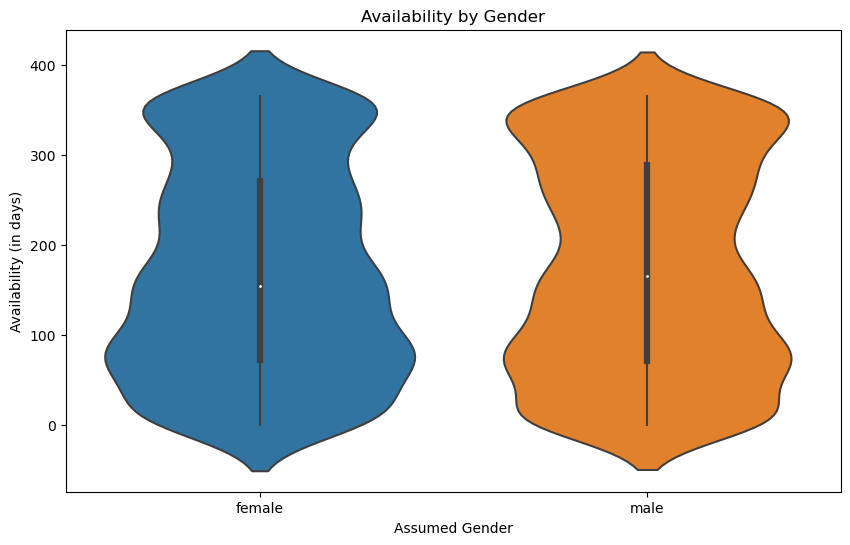

In [22]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'assumed_gender', y = 'availability_365', data = clean_data)
plt.xlabel('Assumed Gender')
plt.ylabel('Availability (in days)')
plt.title('Availability by Gender')
plt.show()

In [23]:
# Create a contingency table
gender_neighborhood_table = pd.crosstab(clean_data['assumed_gender'], clean_data['neighbourhood_group'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(gender_neighborhood_table)

print("Chi-square test results:")
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square test results:
Chi-square statistic: 97.69673571302343
p-value: 9.342668581202263e-14


**Note:** Based on the Chi-square test results, there is a significant association between gender and neighborhood choice. The Chi-square statistic is 97.70, with a p-value of 9.34e-14, indicating that the relationship between gender and neighborhood choice is unlikely to be due to chance.

## Data Visualization & Analysis for Numerical Columns

### Summary Statistics for all Numeric Columns

In [24]:
numeric_columns = clean_data.drop(['id', 'host_id'], axis = 1).select_dtypes(include = 'number')

numeric_columns.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
latitude,4917.0,47.63,0.05,47.50,47.60,47.63,47.67,47.73
longitude,4917.0,-122.33,0.03,-122.42,-122.36,-122.33,-122.31,-122.24
price,4917.0,166.21,165.98,10.00,94.00,131.00,193.00,4000.00
minimum_nights,4917.0,6.23,11.67,1.00,1.00,2.00,3.00,180.00
number_of_reviews,4917.0,77.56,109.38,0.00,9.00,35.00,99.00,1251.00
reviews_per_month,4917.0,2.23,1.94,0.00,0.71,1.80,3.28,22.70
availability_365,4917.0,174.56,118.53,0.00,71.00,161.00,281.00,365.00
number_of_reviews_ltm,4917.0,22.17,24.38,0.00,3.00,15.00,34.00,406.00
total_of_host_listings_count,4917.0,8.62,16.67,1.00,1.00,2.00,6.00,91.00


**Conclusion of summary statistics of numeric columns:** 

- 'latitude' column: The mean latitude is approximately 47.63, with a standard deviation of 0.05. The values range from 47.50 to 47.73. This suggests that the listings are centered around the latitude of 47.63, with a relatively small variation in latitude.

- 'longitude' column: The mean longitude is approximately -122.33, with a standard deviation of 0.03. The values range from -122.42 to -122.24. Similar to latitude, this indicates that the listings are centered around a specific longitude (-122.33) with a relatively small variation.

- 'price' column: The mean price is \\$166.21, with a standard deviation of $165.98. The minimum price is \\$10, and the maximum price is \\$4,000. The 25th percentile is \\$94, and the 75th percentile is \\$193. This suggests that there is a wide range of prices for the listings, with some being significantly more expensive.

- 'minimum_nights' column: The mean minimum nights stay is 6.23, with a standard deviation of 11.67. The values range from 1 to 180. This indicates that the required minimum nights for the listings vary, with some having a shorter minimum stay and others requiring a longer minimum stay.

- 'number_of_reviews' column: The mean number of reviews is 77.56, with a standard deviation of 109.38. The values range from 0 to 1,251. This suggests that the number of reviews for the listings varies, with some having a relatively low number of reviews and others having a higher number.

- 'reviews_per_month' column: The mean reviews per month is 2.23, with a standard deviation of 1.94. The values range from 0 to 22.70. This indicates that the rate of reviews per month varies among the listings, with some having a lower frequency of reviews and others receiving reviews more frequently.

- 'availability_365' column: The mean availability is 174.56 days, with a standard deviation of 118.53 days. The minimum availability is 0 days, and the maximum is 365 days. The 25th percentile is 71 days, and the 75th percentile is 281 days. This suggests that the availability of listings throughout the year varies, with some being available for a significant portion of the year and others having limited availability.

- 'number_of_reviews_ltm' column: The mean number of reviews in the last twelve months is 22.17, with a standard deviation of 24.38. The values range from 0 to 406. This indicates that the recent review activity for the listings varies, with some having a lower number of reviews in the last twelve months and others having a higher number.

- 'total_of_host_listings_count' column: The mean total count of host listings is 8.62, with a standard deviation of 16.67. The values range from 1 to 91. This suggests that the number of listings by hosts varies, with some hosts having a smaller number of listings and others having a larger number.

### Correlation Matrix

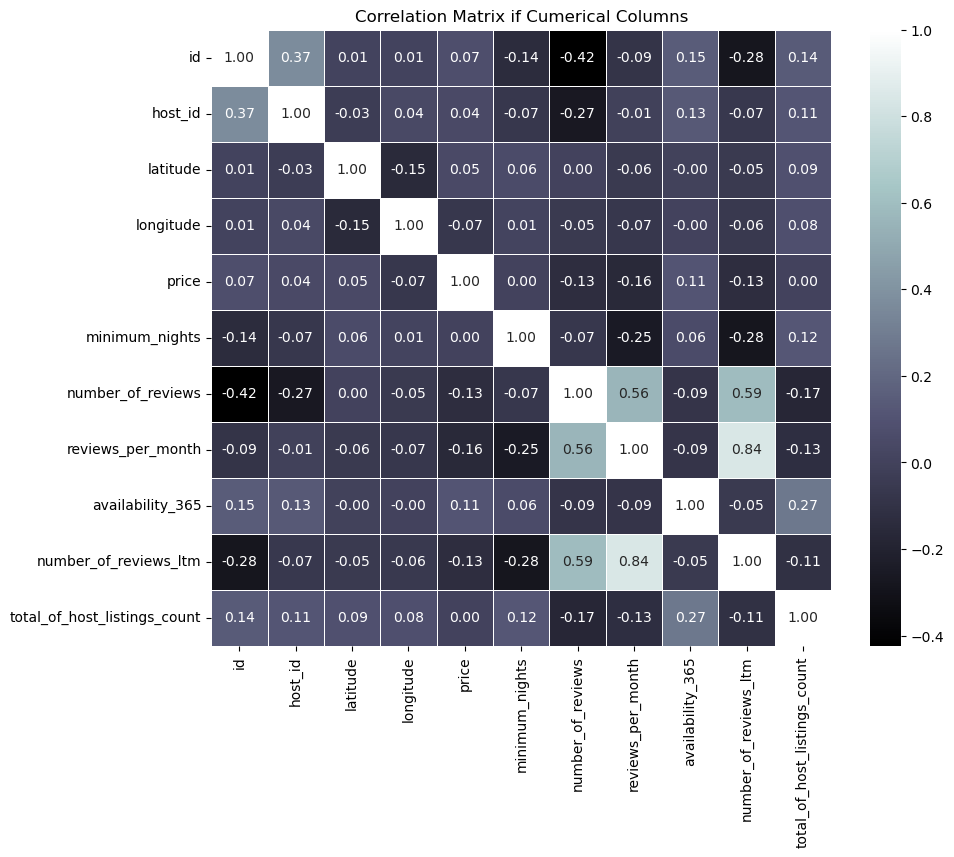

In [25]:
# lets look at the correlation matrix to see what columns to drop during modeling.
numeric_columns = clean_data.select_dtypes(include = [np.number])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix,
            annot = True, 
            cmap = "bone", 
            fmt = ".2f", 
            linewidths = 0.5)

plt.title("Correlation Matrix if Cumerical Columns")
plt.show()

**Conclusion:** To address the high correlation between 'number_of_reviews_ltm', 'reviews_per_month', and 'number_of_reviews' columns, we will keep only 'number_of_reviews' and drop 'number_of_reviews_ltm' and 'reviews_per_month'. The decision to retain 'number_of_reviews' is based on the observation that some properties may have long-term contracts, making the total number of reviews a more relevant and comprehensive metric. Therefore, to avoid redundancy and focus on the most meaningful information, we will **exclude 'number_of_reviews_ltm' and 'reviews_per_month'** from further analysis

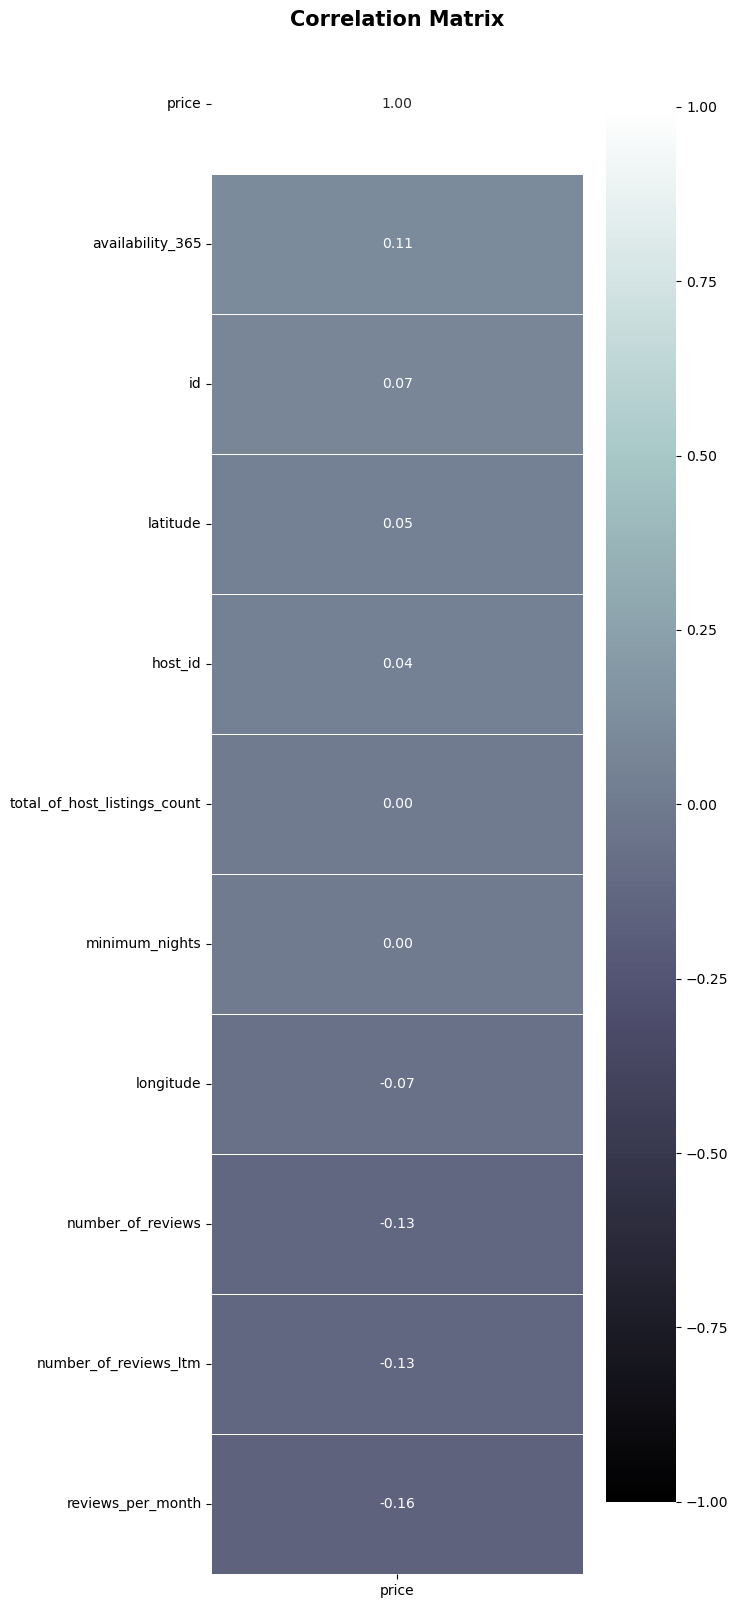

In [26]:
numeric_columns = clean_data.select_dtypes(include = [np.number])

corr = numeric_columns.corr()[['price']].sort_values(by = 'price', ascending = False)

plt.figure(figsize = (6, 20))

sns.heatmap(corr,
            cmap = 'bone',
            annot = True,
            fmt = '.2f',
            linewidths = 0.5,
            vmin = -1,
            vmax = 1)
plt.title('Correlation Matrix', fontweight = 'bold', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

**Note:** Based on the correlation matrix heatmap, we can draw the following conclusions regarding the relationship between the price and other numerical columns:

- The price has a positive correlation of 0.11 with the availability_365 column, indicating that properties with higher prices tend to have more availability throughout the year.
- The correlations between price and the remaining columns (id, latitude, host_id, total_of_host_listings_count, minimum_nights) are relatively weak, with correlation coefficients ranging from 0.04 to 0.07. This suggests that there is little to no significant linear relationship between these variables and the price.
- The price shows a negative correlation of -0.07 with the longitude column, indicating that properties with higher prices tend to be located slightly more towards the west.
- The strongest negative correlations are observed between price and the number_of_reviews, number_of_reviews_ltm, and reviews_per_month columns, with correlation coefficients ranging from -0.13 to -0.16. This suggests that properties with higher prices tend to have lower numbers of reviews and lower review activity.

Overall, these correlations indicate that the price of a property is moderately influenced by its availability throughout the year, while being less influenced by other factors such as property identifiers (id, host_id), location coordinates (latitude, longitude), host-related metrics (total_of_host_listings_count), minimum nights stay, and review-related metrics (number_of_reviews, number_of_reviews_ltm, reviews_per_month).

### Visualizion of Location Factors

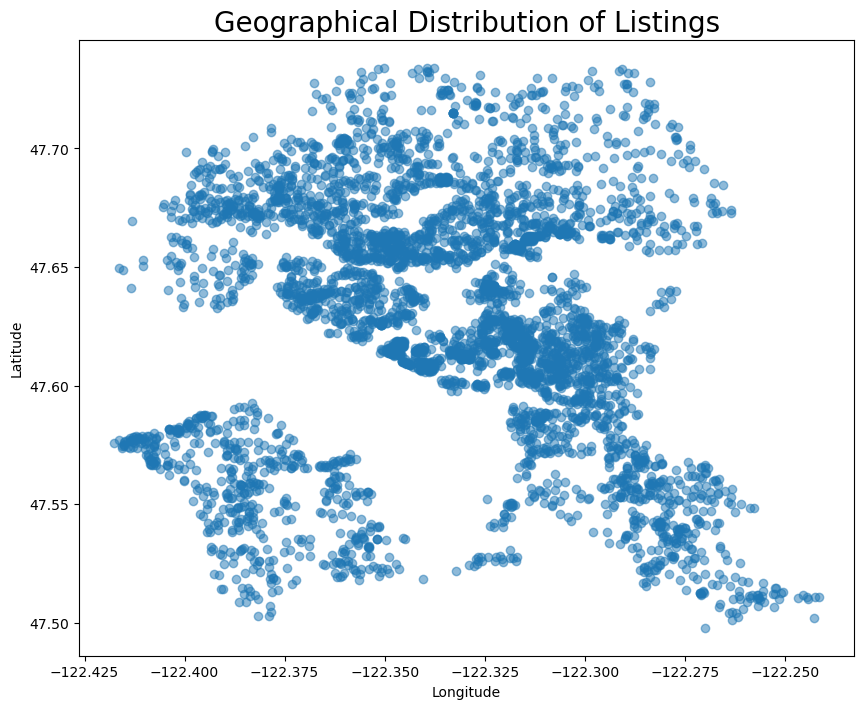

In [27]:
# Visualization of 'latitude' and 'longitude' columns

# Scatter plot for latitude and longitude
plt.figure(figsize = (10, 8))
plt.scatter(clean_data['longitude'], clean_data['latitude'], alpha = 0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Listings', size = 20)
plt.show()

### Visualization of Price Column

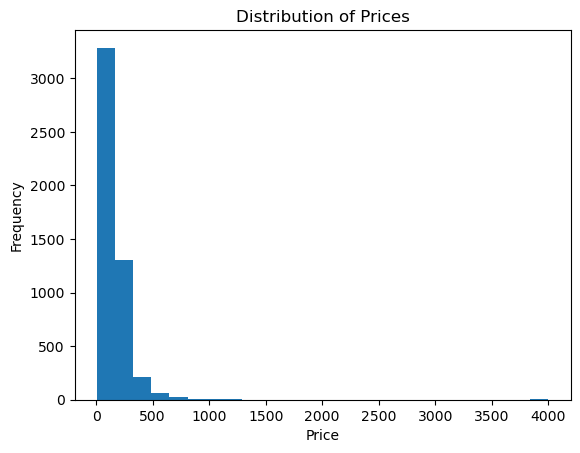

In [28]:
# Histogram
plt.hist(clean_data['price'], bins = 25)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show();

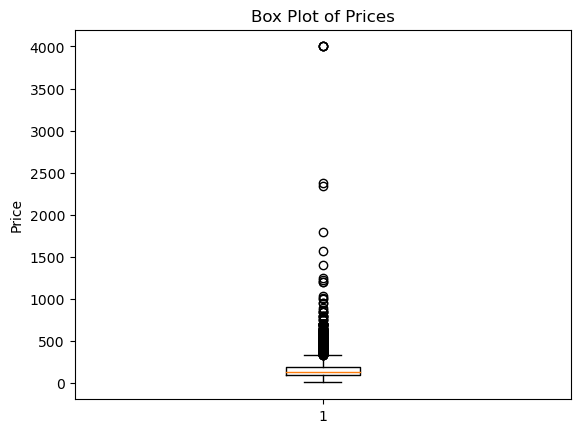

In [29]:
# Box plot alone for price of the houses
plt.boxplot(clean_data['price'])
plt.ylabel('Price')
plt.title('Box Plot of Prices')
plt.show()

**Note:** based on this box plot, it becomes evident that outliers are present, indicating a subset of listings with exceptionally high prices. Furthermore, the majority of houses are priced below $450 per night, as observed from the analysis.

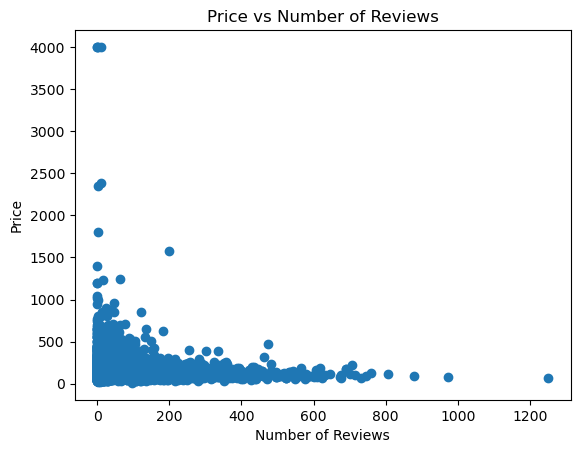

In [30]:
# Scatter plot price vs. reviews 
plt.scatter(clean_data['number_of_reviews'], clean_data['price'])
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Price vs Number of Reviews')
plt.show()

**Note:** In the scatter plot of price versus the number of reviews, the majority of dots concentrated in the lower left corner indicate a trend where most listings have relatively low prices and a smaller number of reviews. This pattern suggests that a significant proportion of the listings are priced below $1000 and have received fewer than 800 reviews. The triangular shape formed by the dots further emphasizes this concentration, indicating that there are relatively fewer listings with higher prices and a greater number of reviews.

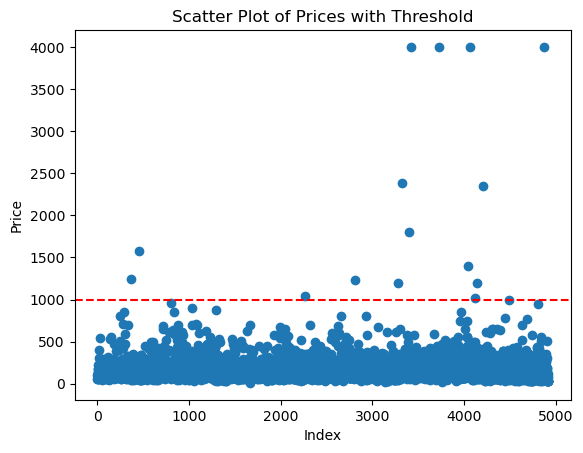

In [31]:
# now lets look at the outliers in the price column
threshold = 1000

plt.scatter(clean_data.index, clean_data['price'])
plt.axhline(y = threshold, color = 'red', linestyle = '--')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Scatter Plot of Prices with Threshold')
plt.show()

**Note:** The dots represent the prices of the listings, while the red dashed line represents a threshold value of $1000.

Observing the plot, we can see that the majority of the dots are located below the threshold, indicating that most listings have prices below \\$1000. Additionally, it is evident that a significant portion of the dots is even below $500. However, there are 14 dots that exceed the threshold and are located above the red dashed line, suggesting that these listings have higher prices compared to the rest.



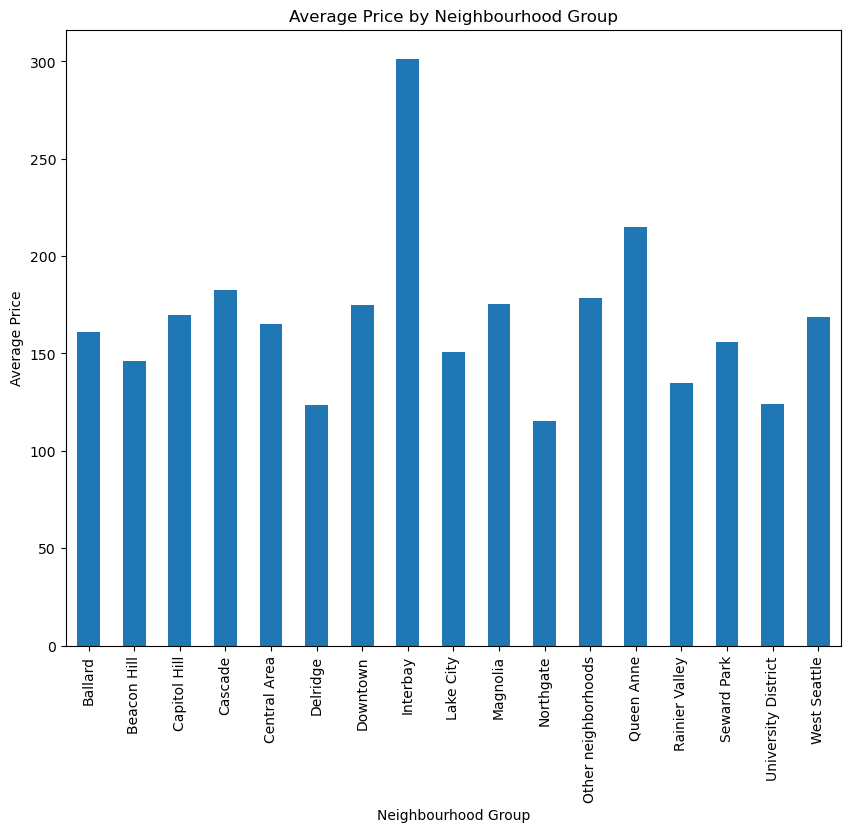

In [32]:
# Grouped analysis of price and neighbourhood_group
grouped_prices = clean_data.groupby('neighbourhood_group')['price'].mean()

plt.figure(figsize = (10, 8))
grouped_prices.plot(kind = 'bar')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhood Group')
plt.show()

**Note:** Based on the grouped analysis of price by neighborhood group, we observe variations in the average prices among different neighborhoods. Interbay has the highest average price of approximately \\$300, followed by Queen Anne with an average price of around \\$250. Cascade ranks third with an average price of about \\$180. On the other hand, Northgate has the lowest average price among the neighborhoods, at around \\$110. These findings indicate that the neighborhood group can be a significant factor influencing the average price of listings. Factors such as location, amenities, and demand in specific neighborhoods contribute to these price differences.

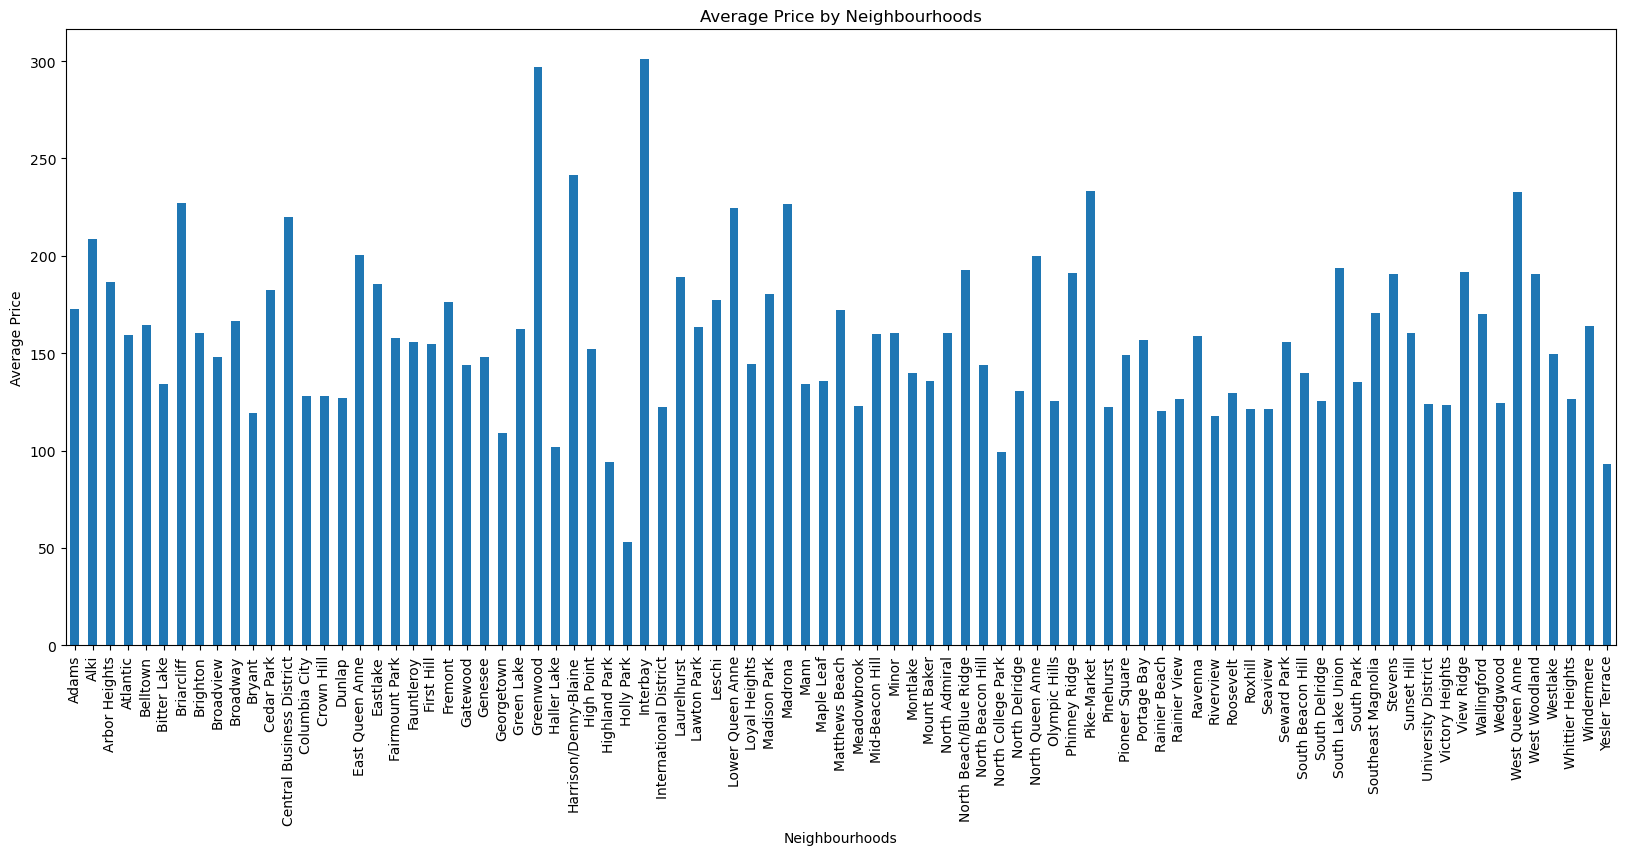

In [33]:
# Grouped analysis of price and neighbourhoods
grouped_prices = clean_data.groupby('neighbourhood')['price'].mean()

plt.figure(figsize = (20, 8))
grouped_prices.plot(kind = 'bar')
plt.xlabel('Neighbourhoods')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhoods')
plt.show()

**Note:** Based on the grouped analysis of price by neighborhoods, we can observe significant variations in average prices across different neighborhoods. Interbay has the highest average price, with an approximate value of \\$300. Greenwood follows closely with an average price of around \\$290. Harrison/Denny-Blaine ranks third with an average price of \\$250. Phinney Ridge and Briarcliff share the fourth position with average prices of approximately \\$230. On the other hand, Holy Park has the lowest average price among the neighborhoods, with prices hovering around $60. These findings demonstrate that the choice of neighborhood can have a substantial impact on the average price of listings. Various factors such as location, amenities, proximity to attractions, and neighborhood characteristics contribute to these price disparities.

**Overall regarding 'neighbourhood_group' and 'neighbourhood' columns:** The analysis of average prices by neighborhoods provides additional insights into the distribution of prices across the neighborhood groups depicted on the Seattle map. By examining the average prices within each neighborhood, we can identify patterns and compare them with the broader neighborhood group distribution. While the neighborhood groups on the Seattle map provide a higher-level view of the city's geographical divisions, the analysis of average prices by neighborhoods offers a more granular perspective. It allows us to understand the variations in prices within each neighborhood group and identify specific neighborhoods that stand out in terms of higher or lower average prices. By combining the information from the neighborhood group distribution on the map and the average price analysis by neighborhoods, we can gain a more comprehensive understanding of how prices are distributed across Seattle. It provides a nuanced view of the city's real estate market, highlighting both neighborhood group trends and the unique characteristics of individual neighborhoods within those groups.

### Visualization of Stay Duration ('minimum_nights' column)

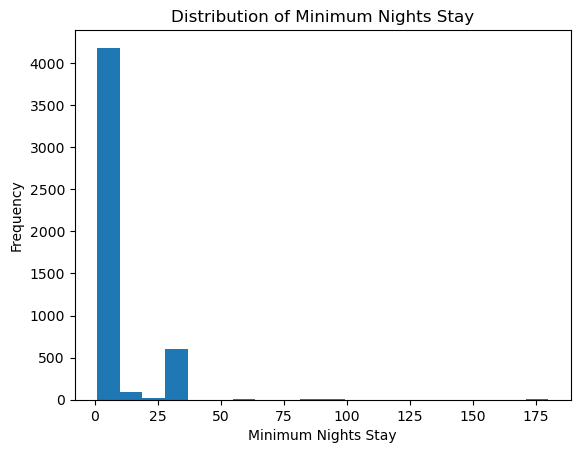

In [34]:
plt.hist(clean_data['minimum_nights'], bins = 20)
plt.xlabel('Minimum Nights Stay')
plt.ylabel('Frequency')
plt.title('Distribution of Minimum Nights Stay')
plt.show()

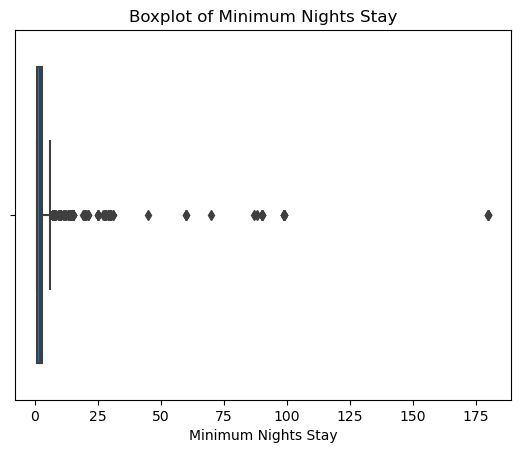

In [35]:
sns.boxplot(x = clean_data['minimum_nights'])
plt.xlabel('Minimum Nights Stay')
plt.title('Boxplot of Minimum Nights Stay')
plt.show()

**Note:** based on these histagram and box plot, it is evident that the majority of listings have a minimum nights stay of less than 10 days. However, there are notable clusters of outliers with specific durations of 10+ days, 30+ days, 60+ days, 90+ days, 100+ days, and 180+ days. These outliers represent a distinct subset of listings that require longer minimum stays compared to the majority of listings.

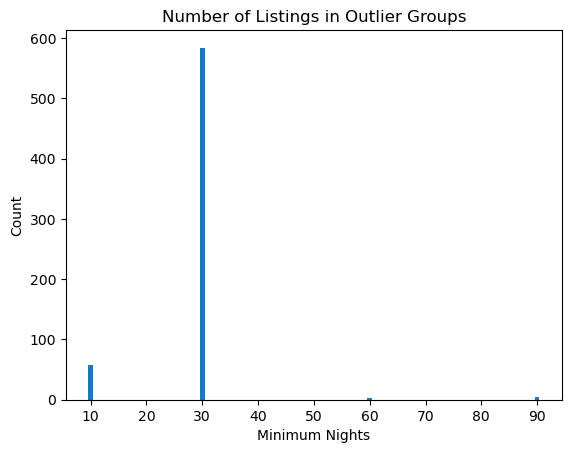

In [36]:
# lets look at the outliers
# Grouping the listings by outlier groups
outlier_groups = [10, 30, 60, 80, 90, 175]
outlier_listings = clean_data[clean_data['minimum_nights'].isin(outlier_groups)]

# Counting the number of listings in each outlier group
outlier_counts = outlier_listings['minimum_nights'].value_counts()

# Visualizing the outlier groups
plt.bar(outlier_counts.index, outlier_counts.values)
plt.xlabel('Minimum Nights')
plt.ylabel('Count')
plt.title('Number of Listings in Outlier Groups')
plt.show()

**Note:** The analysis reveals that the majority of outliers in the 'minimum_nights' column are concentrated in the 30 days group, comprising approximately 600 properties. Subsequently, the 10 days group follows with around 60 properties. The 60 days and 90 days groups exhibit a lower number of outliers, likely consisting of less than 10 properties each. Notably, the plot does not display the 180 days value, which suggests that there may be a limited number of properties falling into this particular outlier category. Further investigation into the reasons behind this absence would be beneficial to gain a comprehensive understanding of the data.

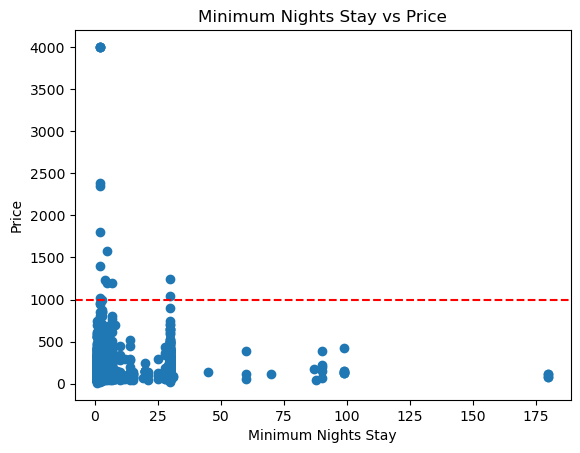

In [37]:
# scatter plot duration of the stay vs. price
plt.scatter(clean_data['minimum_nights'], clean_data['price'])
plt.axhline(y = threshold, color = 'red', linestyle = '--')
plt.xlabel('Minimum Nights Stay')
plt.ylabel('Price')
plt.title('Minimum Nights Stay vs Price')
plt.show()

**Note:** This scatter plot showcases the relationship between the minimum nights stay and the corresponding price of the properties. It is evident that the majority of properties have a minimum nights stay of less than 30 days. Additionally, a significant proportion of prices are below 1250 units. Notably, the highest price of 4000 units is associated with properties that offer a very short minimum nights stay, typically ranging from 0 to 1 night. This observation highlights the potential for higher-priced listings with shorter durations, which may cater to specific needs or unique offerings in the market. Also, the price of the units that are 180+ nights is bellow $250 per night arrourding to this plot.

### Visualization of Availability During the Calander Year (availability_365' column)

In [38]:
# since 'availability_365' column is days in a year
# and avarage year has 365 days and 366 days in the leap year
# so, first lets check that we have not more the 365 nights for all leastings
all_less_than_365 = (clean_data['availability_365'] <= 365).all()

all_less_than_365

True

**Note:** Given that all listings have an availability of no more than 365 nights, we can proceed with our analysis.

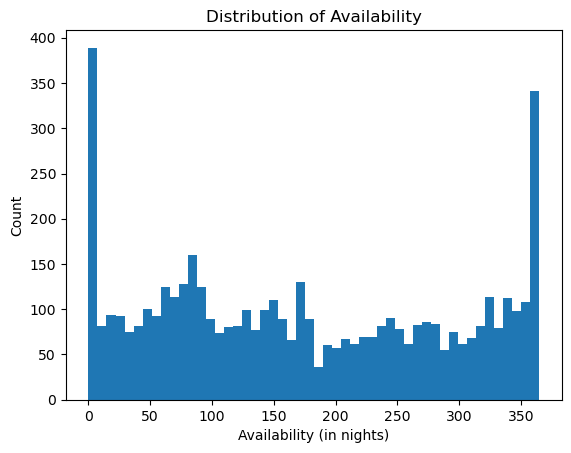

In [39]:
# Histogram of availability
plt.hist(clean_data['availability_365'], bins = 50)
plt.xlabel('Availability (in nights)')
plt.ylabel('Count')
plt.title('Distribution of Availability')
plt.show()

**Note:** The histogram of availability reveals some interesting insights. The tallest bars are observed at 1 night (approximately 390 properties) and 364 nights (around 350 properties). This suggests that a significant number of listings have either very limited availability or are available throughout the entire year. The distribution of availability for other durations shows a decrease, with each bin representing fewer than 160 properties. Additionally, it appears that the minimum availability is around 180 nights.

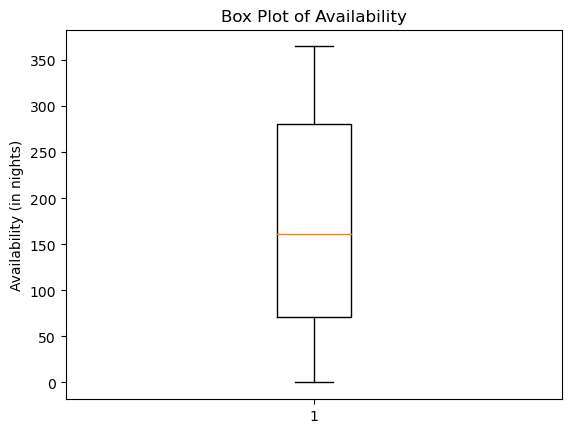

In [40]:
# Box plot of availability
plt.boxplot(clean_data['availability_365'])
plt.ylabel('Availability (in nights)')
plt.title('Box Plot of Availability')
plt.show()

**Note:** The box plot of availability provides valuable information about the distribution of availability values. The line within the box is positioned around 155 nights, indicating the median value. The box itself extends from approximately 75 nights at the bottom (25th percentile) to around 290 nights at the top (75th percentile). This suggests that the majority of listings have availability within this range.

Furthermore, the absence of any dot outliers indicates that there are no extreme values that deviate significantly from the overall distribution. The whiskers, represented by the lines connected to the box, span from 0 to 364 nights, encompassing the minimum and maximum values observed in the dataset.

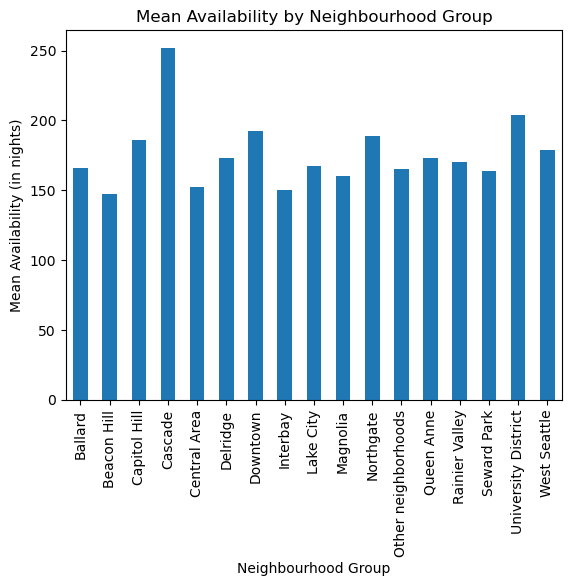

In [41]:
# Grouped analysis by neighbourhood group
grouped_data = clean_data.groupby('neighbourhood_group')['availability_365'].mean()
grouped_data.plot(kind = 'bar')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Mean Availability (in nights)')
plt.title('Mean Availability by Neighbourhood Group')
plt.show()

**Note:** The bar plot displays the mean availability of listings in different neighborhood groups. From the plot, it is evident that the Cascade neighborhood group has the highest mean availability, followed by the University District, Downtown, Northgate, and finally, Beacon Hill and Interbay have the lowest mean availability. The y-axis represents the mean availability in nights, indicating the average number of nights listings in each neighborhood group are available for booking. This visualization provides a comparison of the mean availability across neighborhood groups, highlighting the variations in availability among different areas.

### Visualization of Reviews' Columns

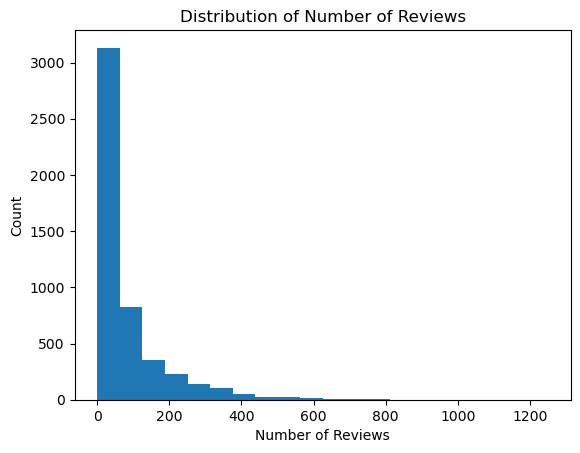

In [42]:
# number_of_reviews
plt.hist(clean_data['number_of_reviews'], bins = 20)
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.title('Distribution of Number of Reviews')
plt.show()

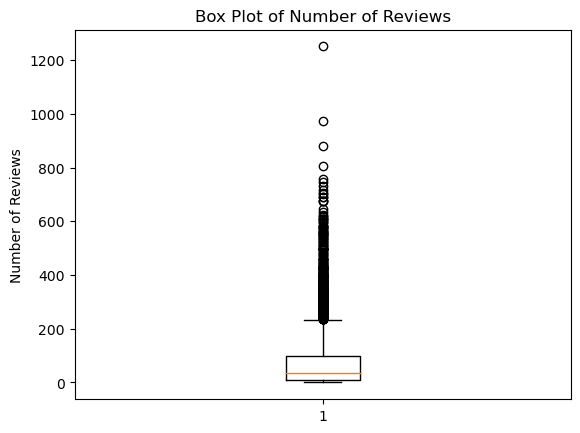

In [43]:
# number_of_reviews
plt.boxplot(clean_data['number_of_reviews'])
plt.ylabel('Number of Reviews')
plt.title('Box Plot of Number of Reviews')
plt.show()

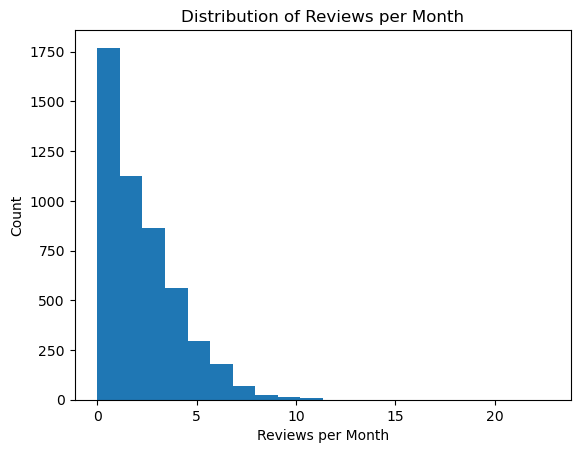

In [44]:
# reviews_per_month
plt.hist(clean_data['reviews_per_month'], bins = 20)
plt.xlabel('Reviews per Month')
plt.ylabel('Count')
plt.title('Distribution of Reviews per Month')
plt.show()

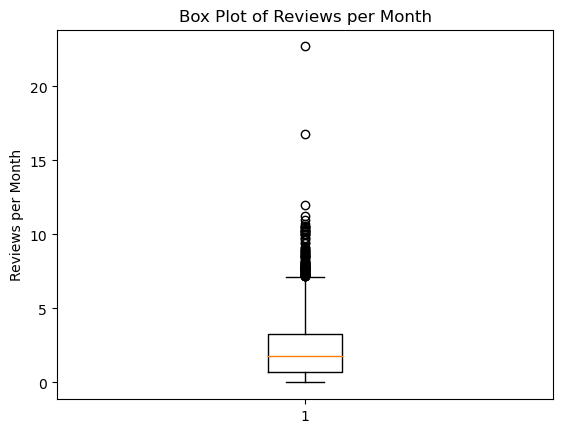

In [45]:
# reviews_per_month
plt.boxplot(clean_data['reviews_per_month'])
plt.ylabel('Reviews per Month')
plt.title('Box Plot of Reviews per Month')
plt.show()

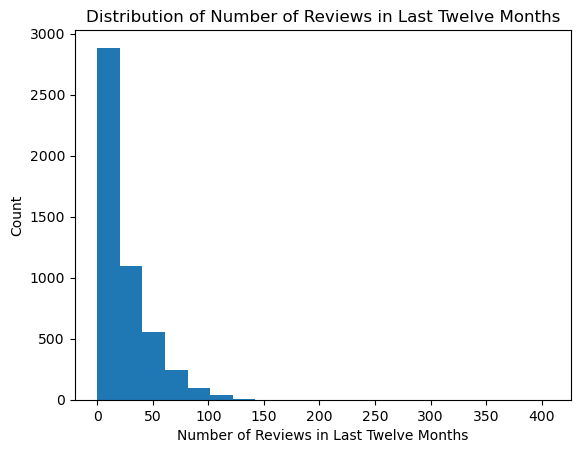

In [46]:
# number_of_reviews_ltm
plt.hist(clean_data['number_of_reviews_ltm'], bins = 20)
plt.xlabel('Number of Reviews in Last Twelve Months')
plt.ylabel('Count')
plt.title('Distribution of Number of Reviews in Last Twelve Months')
plt.show()

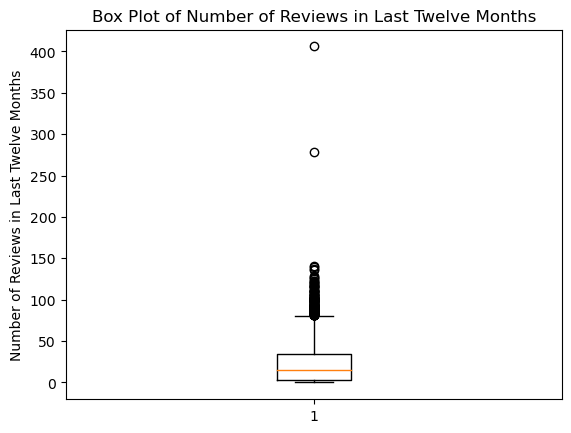

In [47]:
# number_of_reviews_ltm
plt.boxplot(clean_data['number_of_reviews_ltm'])
plt.ylabel('Number of Reviews in Last Twelve Months')
plt.title('Box Plot of Number of Reviews in Last Twelve Months')
plt.show()

**Note:** Based on the summary statistics and the visualizations, we can draw the following conclusions:

1. 'number_of_reviews' column:
    - The mean number of reviews is 77.56, with a standard deviation of 109.38.
    - The values range from 0 to 1,251.
    - The histogram shows a distribution with a gradual drop, indicating that there are listings with a relatively low number of reviews and others with a higher number.
    - The box plot suggests that most of the data points are concentrated between around 220 and 800 reviews, with some outliers extending beyond 1,200 reviews.

2. 'reviews_per_month' column:
    - The mean reviews per month is 2.23, with a standard deviation of 1.94.
    - The values range from 0 to 22.70.
    - The histogram shows a relatively smoother decline from 1 to around 8, indicating a range of review frequencies among the listings.
    - The box plot reveals that the majority of the data points are between around 7-8 and 25 reviews per month, with a significant cluster between 7-8 and 13 reviews per month.

3. 'number_of_reviews_ltm' column:
    - The mean number of reviews in the last twelve months is 22.17, with a standard deviation of 24.38.
    - The values range from 0 to 406.
    - The box plot shows that the majority of the data points are located between around 80 and 160 reviews in the last twelve months, with two outliers at around 290 and above 400.

Overall, the analysis suggests that the number of reviews and review frequency varies among the listings. Some listings have a relatively low number of reviews or review activity, while others have a higher number, particularly in the case of 'number_of_reviews'. Additionally, 'reviews_per_month' shows a more gradual decline in frequency compared to the other two columns.

#### number_of_reviews

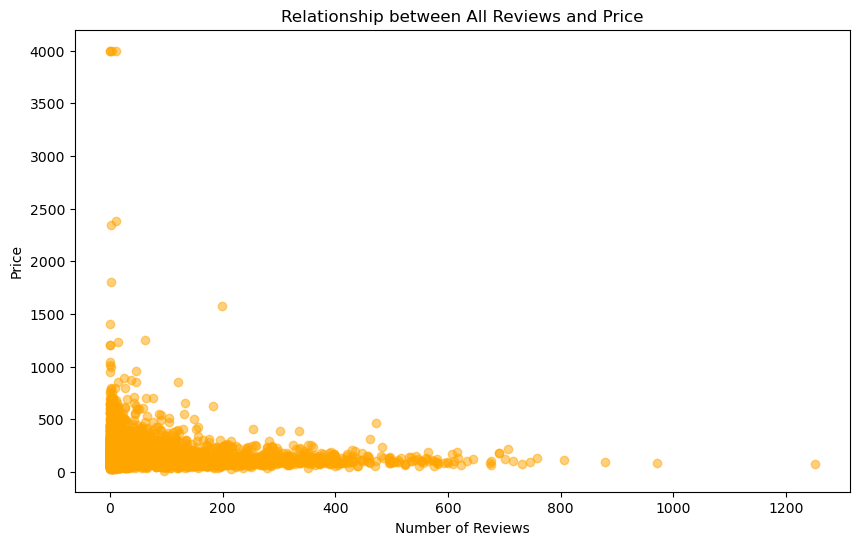

In [48]:
# number_of_reviews vs. price
plt.figure(figsize = (10, 6))
plt.scatter(clean_data['number_of_reviews'], clean_data['price'], color = 'orange', alpha = 0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Relationship between All Reviews and Price')
plt.show()

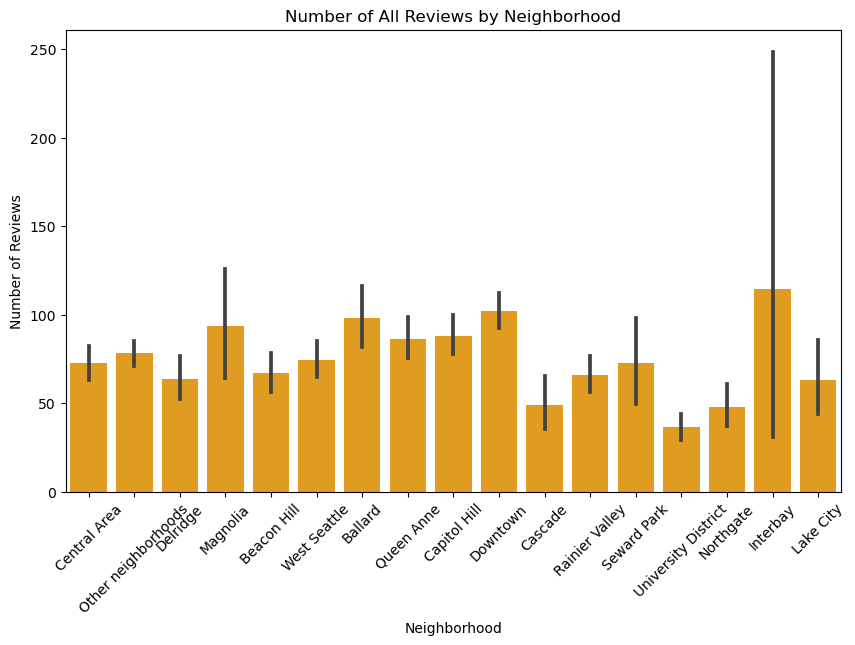

In [49]:
# number_of_reviews vs. neighbourhood_group
plt.figure(figsize = (10, 6))
sns.barplot(x = 'neighbourhood_group', y = 'number_of_reviews', color = 'orange', data = clean_data)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reviews')
plt.title('Number of All Reviews by Neighborhood')
plt.xticks(rotation = 45)
plt.show()

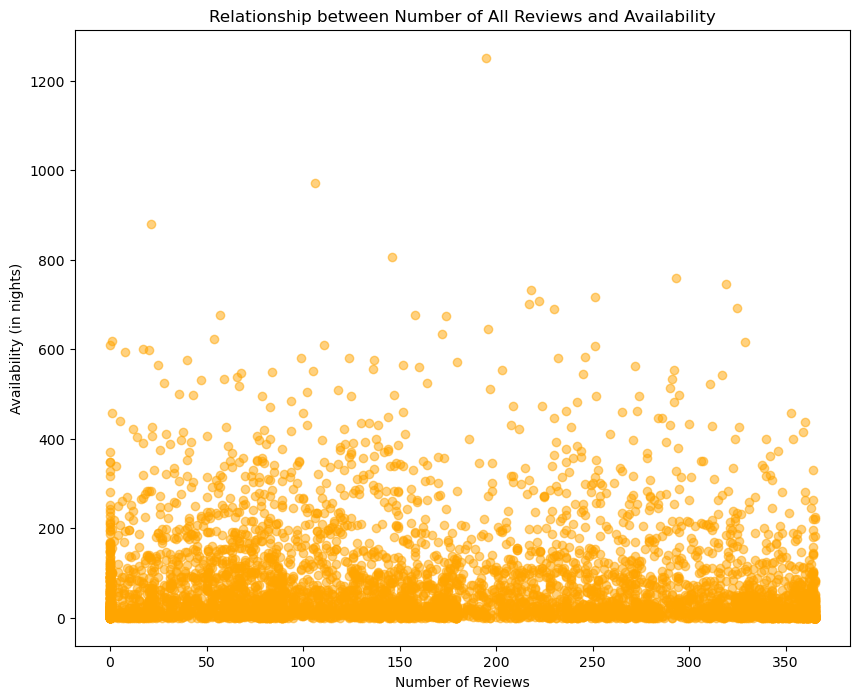

In [50]:
# avilability vs. number_of_reviews
plt.figure(figsize = (10, 8))
plt.scatter(clean_data['availability_365'], clean_data['number_of_reviews'], color = 'orange', alpha = 0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Availability (in nights)')
plt.title('Relationship between Number of All Reviews and Availability')
plt.show()

#### reviews_per_month

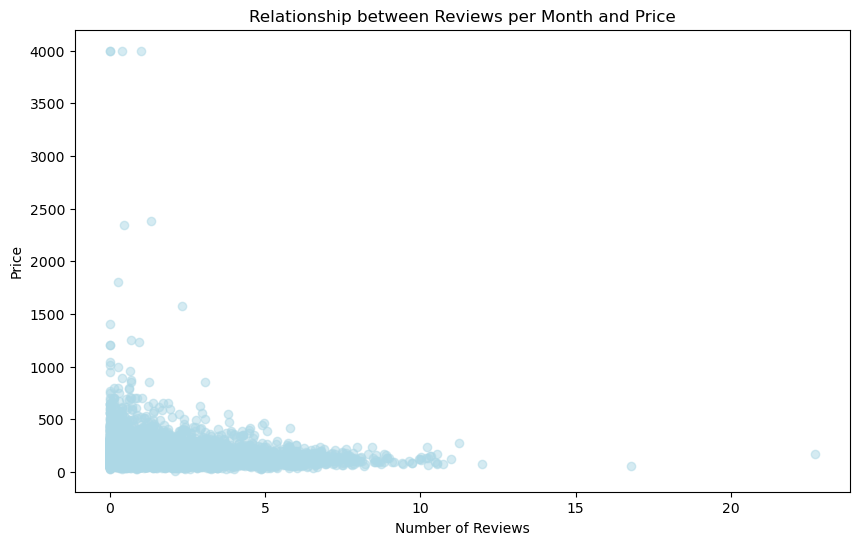

In [51]:
# reviews_per_month vs. price
plt.figure(figsize = (10, 6))
plt.scatter(clean_data['reviews_per_month'], clean_data['price'], color = 'lightblue', alpha = 0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Relationship between Reviews per Month and Price')
plt.show()

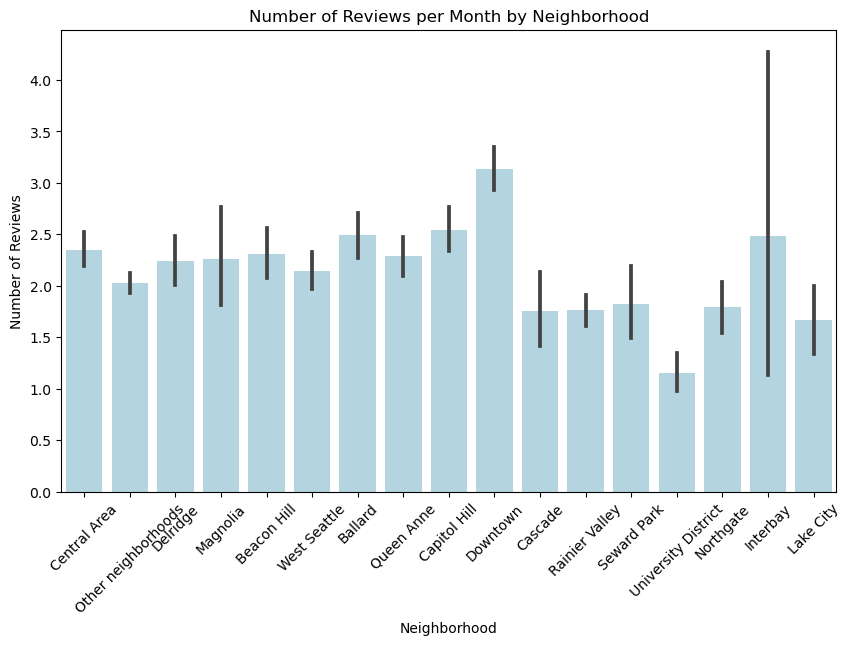

In [52]:
# reviews_per_month vs. neighbourhood_group
plt.figure(figsize = (10, 6))
sns.barplot(x = 'neighbourhood_group', y = 'reviews_per_month', color = 'lightblue', data = clean_data)
plt.xlabel('Neighborhood') 
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Month by Neighborhood')
plt.xticks(rotation = 45)
plt.show()

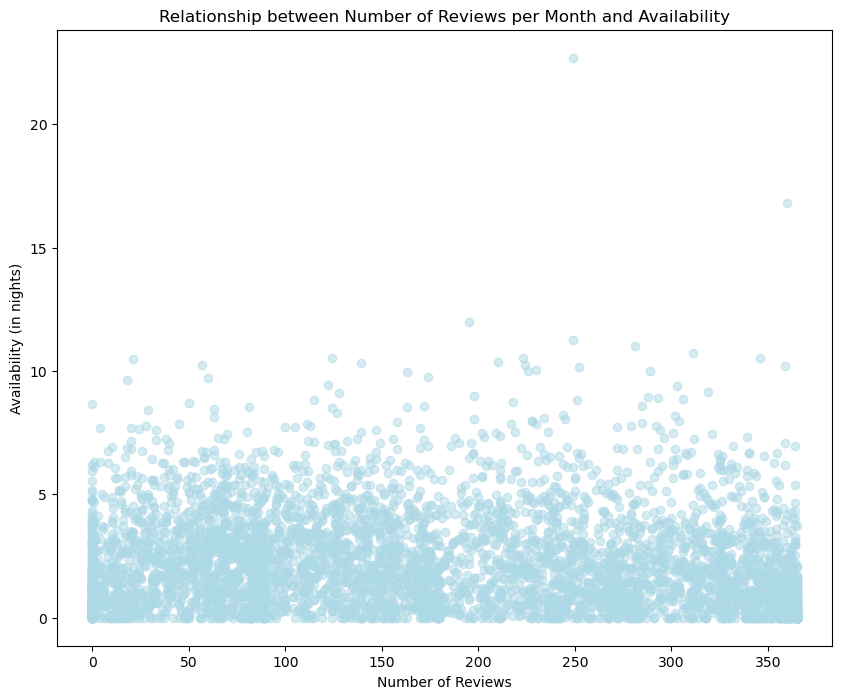

In [53]:
# avilability vs. reviews_per_month
plt.figure(figsize = (10, 8))
plt.scatter(clean_data['availability_365'], clean_data['reviews_per_month'], color = 'lightblue', alpha = 0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Availability (in nights)')
plt.title('Relationship between Number of Reviews per Month and Availability')
plt.show()

#### number_of_reviews_ltm

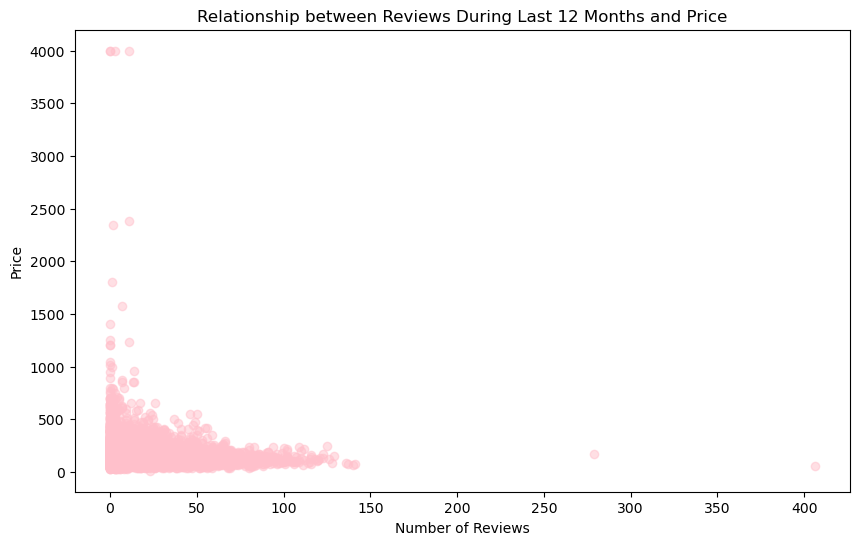

In [54]:
# number_of_reviews_ltm vs. price
plt.figure(figsize = (10, 6))
plt.scatter(clean_data['number_of_reviews_ltm'], clean_data['price'], color = 'pink', alpha = 0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Relationship between Reviews During Last 12 Months and Price')
plt.show()

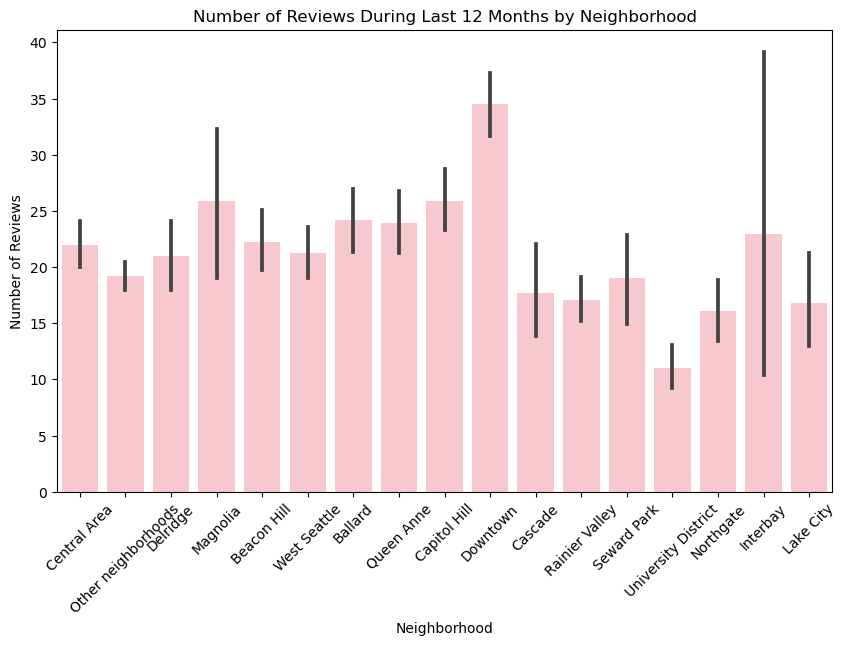

In [55]:
# number_of_reviews_ltm vs. neighbourhood_group
plt.figure(figsize = (10, 6))
sns.barplot(x = 'neighbourhood_group', y = 'number_of_reviews_ltm', color = 'pink', data = clean_data)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews During Last 12 Months by Neighborhood')
plt.xticks(rotation = 45)
plt.show()

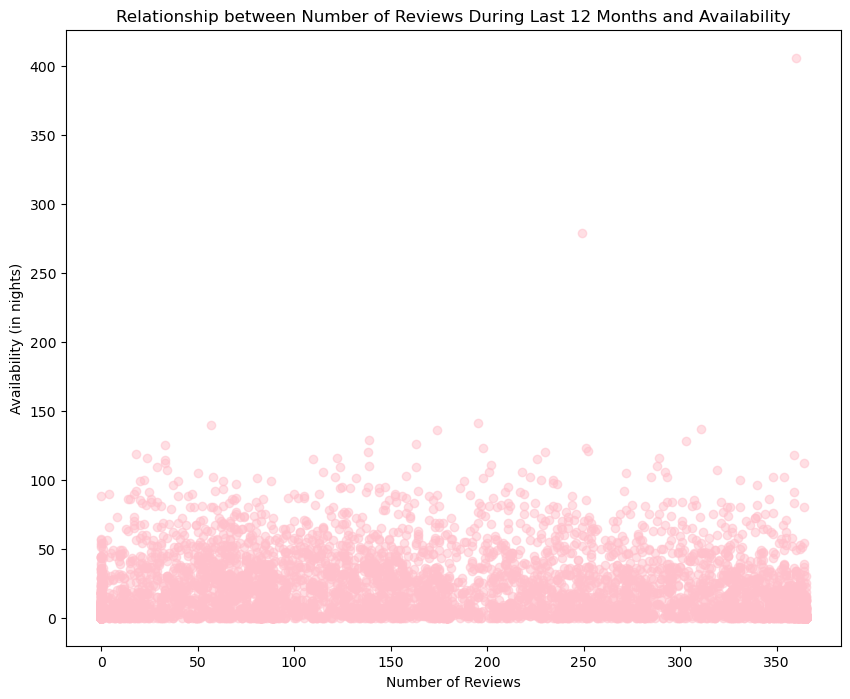

In [56]:
# avilability vs. number_of_reviews_ltm
plt.figure(figsize = (10, 8))
plt.scatter(clean_data['availability_365'], clean_data['number_of_reviews_ltm'], color = 'pink', alpha = 0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Availability (in nights)')
plt.title('Relationship between Number of Reviews During Last 12 Months and Availability')
plt.show()

**Note:** Based on the these plots, which represent the relationship between different variables such as the number of reviews, price, neighborhood, and availability, we can draw the following conclusions:

1. Number of Reviews vs. Price: The scatter plot shows the relationship between the number of reviews and the price of listings. It appears that there is no strong linear correlation between the two variables. However, there is a concentration of listings with a higher number of reviews and lower prices, indicating that more affordable properties may attract more reviews.

2. Number of Reviews vs. Neighborhood: The bar plot illustrates the number of reviews across different neighborhood groups. It shows the average number of reviews for each neighborhood. There seems to be some variation in the number of reviews among neighborhoods, with certain neighborhoods receiving higher review counts compared to others.

3. Availability vs. Number of Reviews: The scatter plot demonstrates the relationship between the availability of listings and the number of reviews. It appears that there is no significant correlation between these variables. Listings with a wide range of availability can have varying numbers of reviews, indicating that availability alone does not strongly influence the number of reviews.

Analyzing these plots, we can conclude that the number of reviews is not solely determined by factors like price, neighborhood, or availability. Other factors such as listing quality, amenities, and customer experiences may also contribute to the number of reviews. It is important to consider these additional factors when analyzing the relationship between reviews and other variables.

Furthermore, comparing the plots for the number of reviews, reviews per month, and reviews in the last 12 months, they seem to exhibit similar patterns. This suggests that the overall review activity, frequency of reviews, and recent review trends are consistent across the listings, regardless of the time frame considered.

### Visualization of Total Number of Listings per Host ('total_of_host_listings_count' column)

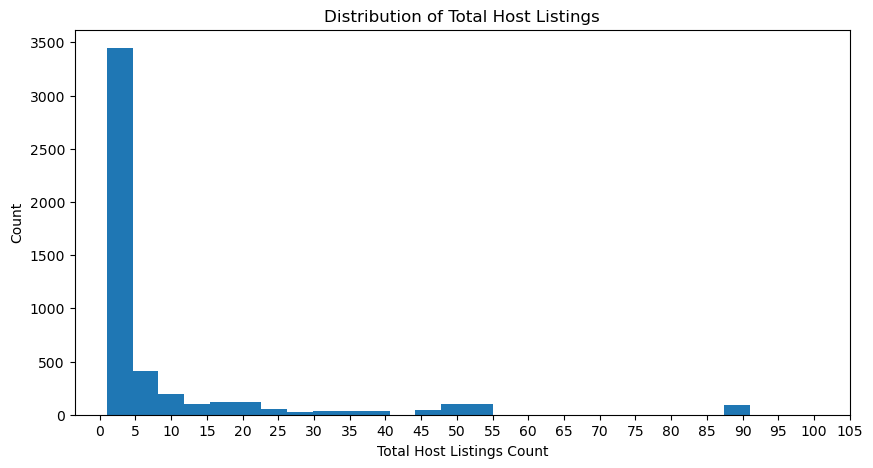

In [57]:
# Distribution of Total Host Listings
plt.figure(figsize = (10, 5))
plt.hist(clean_data['total_of_host_listings_count'], bins = 25)
plt.xlabel('Total Host Listings Count')
plt.ylabel('Count')
plt.title('Distribution of Total Host Listings')
plt.xticks(range(0, 110, 5))
plt.show()

**Note:** The histogram plot shows the distribution of the 'total_of_host_listings_count' column, representing the total count of host listings. Here's an explanation based on the provided observations:

- The histogram reveals that the majority of hosts have a relatively small number of listings. The tallest bar, with a count of around 3500, corresponds to hosts with 1 to 4 listings. This suggests that a significant proportion of hosts on the platform have a limited number of properties they offer.

- The next tallest bar, with a count of around 400, represents hosts with 5 to 7 listings. Although smaller in comparison to the first bar, it still indicates a noticeable number of hosts with a slightly higher count of listings.

- Following that, the bar from 8 to 11 listings has a count of less than 2500, indicating a decrease in the number of hosts with a moderate number of listings.

- The remaining bars, from 12 to 40 and beyond, have relatively smaller counts. There are no visible bars for counts between 41 and 44, as well as from 55 to 87 and after 91. This suggests that hosts with a higher number of listings are less common. 

- Also, it is shocking to me that there are a group od people with 87-91 listings (outliers).

Overall, the histogram provides insights into the distribution of total host listings, highlighting that a significant portion of hosts have a limited number of listings, while fewer hosts have a higher count of listings.

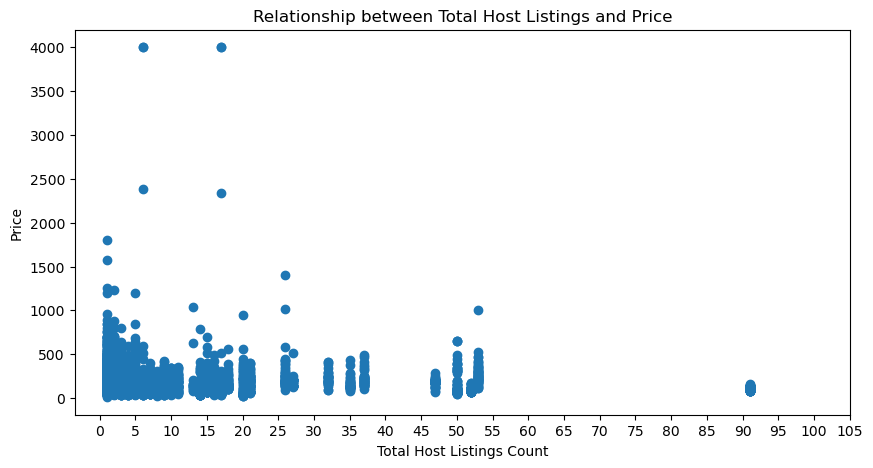

In [58]:
# Relationship with Price
plt.figure(figsize = (10, 5))
plt.scatter(clean_data['total_of_host_listings_count'], clean_data['price'])
plt.xlabel('Total Host Listings Count')
plt.ylabel('Price')
plt.title('Relationship between Total Host Listings and Price')
plt.xticks(range(0, 110, 5))
plt.show()

**Note:** The majority of dots are concentrated in the lower right corner of the plot, indicating a cluster of listings with relatively lower prices and a smaller number of total host listings. This suggests that many properties with a lower price range are offered by hosts who have a limited number of listings.

There are noticeable drops in the density of dots as we move from left to right along the x-axis. These drops occur around values 22 to 25, 27 to 31, and 37 to 46 on the 'total_of_host_listings_count' axis. These drops indicate that there are fewer listings with a specific count of total host listings, possibly suggesting a transition or segmentation in the market.

Additionally, there is a separate group of dots located around the maximum value of 'total_of_host_listings_count,' which is approximately 91. This indicates that a few hosts have a relatively large number of listings, possibly indicating more established or professional hosts.

Overall, the scatter plot provides insights into the relationship between the total host listings count and the price of the listings. It suggests that there is a connection between the number of listings a host has and the pricing of those listings, with a concentration of lower-priced listings being offered by hosts with a smaller count of total host listings.

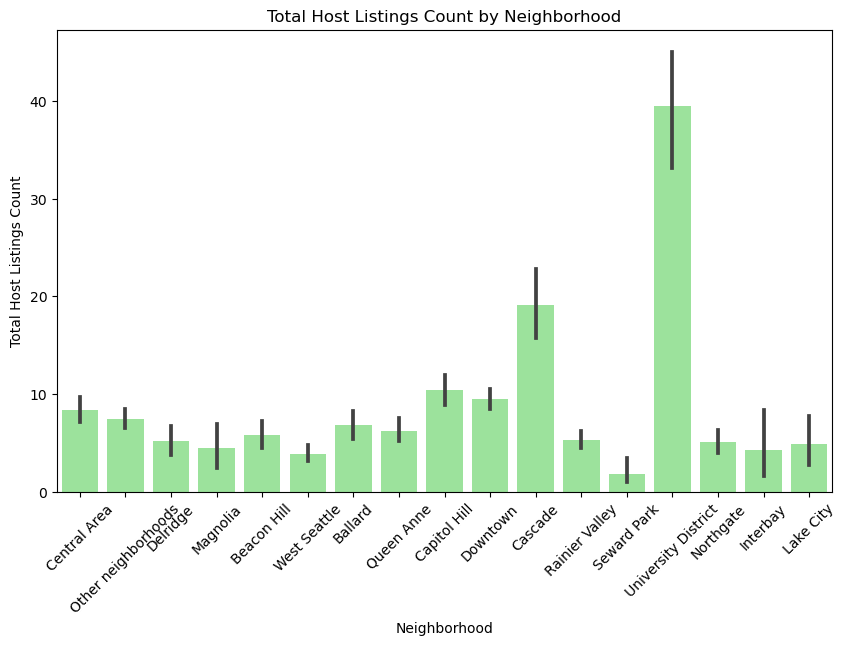

In [59]:
# Relationship with Neighborhood
plt.figure(figsize = (10, 6))
sns.barplot(x = 'neighbourhood_group', y = 'total_of_host_listings_count', color = 'lightgreen', data = clean_data)
plt.xlabel('Neighborhood')
plt.ylabel('Total Host Listings Count')
plt.title('Total Host Listings Count by Neighborhood')
plt.xticks(rotation = 45)
plt.show()

**Note:** The bar plot reveals notable variations in the total count of host listings across different neighborhoods. Seward Park emerges as the neighborhood with the highest average count of host listings, indicated by a substantial bar height of approximately 40. In contrast, Rainier Valley exhibits the lowest average count, with a relatively diminutive bar of around 2 to 3. Downtown follows closely with the second highest bar, signifying a considerable average count of host listings, around 20. Similarly, Queen Anne boasts the third highest average count, with a bar height of approximately 11. These observations provide valuable insights into the host activity levels and distribution of listings among distinct neighborhoods in the area.

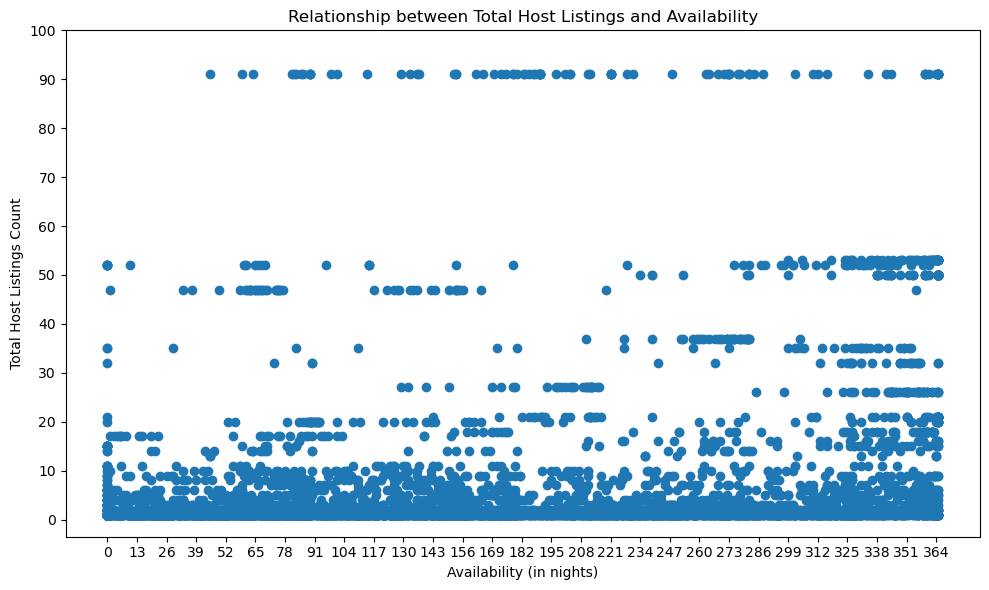

In [60]:
# Relationship with Availability
plt.figure(figsize = (10, 6))
plt.scatter(clean_data['availability_365'], clean_data['total_of_host_listings_count'])
plt.ylabel('Total Host Listings Count')
plt.xlabel('Availability (in nights)')
plt.title('Relationship between Total Host Listings and Availability')
plt.xticks(range(0, 366, 13))
plt.yticks(range(0, 101, 10))
plt.tight_layout()
plt.show()

**Note:** The scatter plot showcases the relationship between the total count of host listings and availability in terms of nights. Noteworthy patterns can be observed within the plot. Initially, a distinctive line of dots becomes apparent at an availability of approximately 91 nights, indicating a concentration of listings with similar availability values. Subsequently, additional lines emerge at around 52 and 48 nights, followed by lines at 35 and 32 nights, and so forth as we move further down the y-axis. These lines suggest a recurring pattern in the availability of host listings, potentially reflecting certain constraints or preferences within the dataset. This finding provides valuable insights into the distribution and availability of host listings, which can inform further analysis and decision-making processes within the context of the data.

## General Conclusion of EDA 

1. Gender Analysis: 
    - The dataset includes an "assumed_gender" column based on names, indicating the assumed gender of the host. However, it is important to note that this assumption may not always be accurate.
    - There are more assumed males than females in the dataset.

2. Neighborhood Analysis:
     - The dataset includes information about neighborhood groups and specific neighborhoods in Seattle.
    - Different neighborhood groups have varying distributions of listings, with some groups having a higher concentration of listings than others.
    - Certain neighborhoods stand out with higher average prices, such as Interbay, Greenwood, and Harrison/Denny-Blaine, while Holy Park has relatively lower average prices.

3. Room Type Analysis:
    - The dataset contains information about different room types offered by hosts.
    - The majority of listings are for "Entire home/apt" (84.4%), followed by "Private room" (15.5%), and a negligible percentage for "Shared room" (0.0%).
    
4. Price Analysis:
    - The dataset includes information on the prices of listings.
    - The average price varies across different neighborhood groups and specific neighborhoods.
    - The relationship between assumed gender and price indicates that females have slightly higher average prices compared to males.

5. Availability Analysis:
    - The dataset contains information about the availability of listings throughout the year.
    - There is no significant difference in availability based on assumed gender.

## Visualizations for Presentation Slides

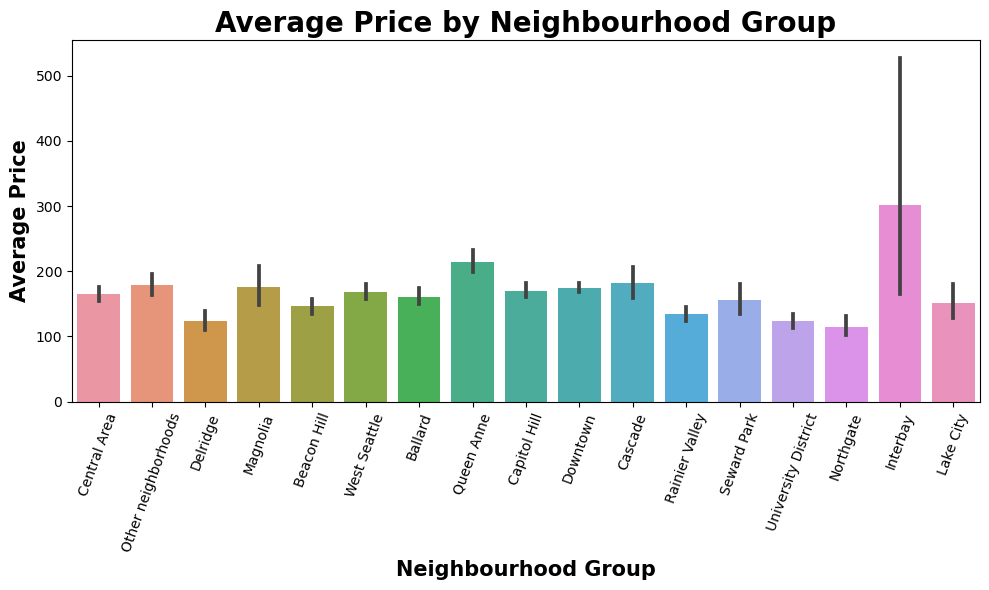

In [61]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'neighbourhood_group', y = 'price', data = clean_data)
plt.xlabel('Neighbourhood Group', fontweight = 'bold', fontsize = 15)
plt.ylabel('Average Price', fontweight = 'bold', fontsize = 15)
plt.title('Average Price by Neighbourhood Group', fontweight = 'bold', fontsize = 20)
plt.xticks(rotation = 70)
plt.tight_layout()
plt.show()

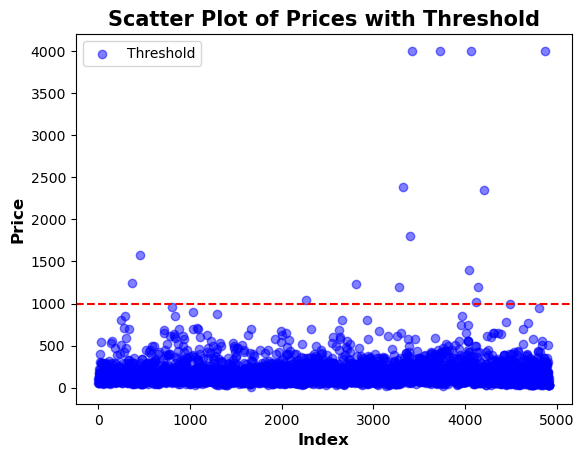

In [62]:
threshold = 1000

plt.scatter(clean_data.index, clean_data['price'], color = 'blue', alpha = 0.5)
plt.axhline(y = threshold, color = 'red', linestyle = '--')
plt.xlabel('Index', fontweight = 'bold', fontsize = 12)
plt.ylabel('Price', fontweight = 'bold', fontsize = 12)
plt.title('Scatter Plot of Prices with Threshold', fontweight = 'bold', fontsize = 15)
plt.legend(['Threshold'], loc = 'upper left')
plt.show()

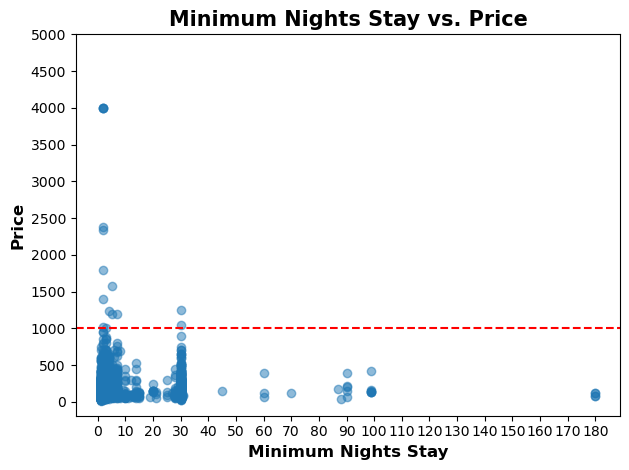

In [63]:
plt.scatter(clean_data['minimum_nights'], clean_data['price'], alpha = 0.5)
plt.axhline(y = threshold, color = 'red', linestyle = '--')
plt.xlabel('Minimum Nights Stay', fontweight = 'bold', fontsize = 12)
plt.ylabel('Price', fontweight = 'bold', fontsize = 12)
plt.title('Minimum Nights Stay vs. Price', fontweight = 'bold', fontsize = 15)
plt.xticks(range(0, 181, 10))
plt.yticks(range(0, 5001, 500))
plt.tight_layout()
plt.show()

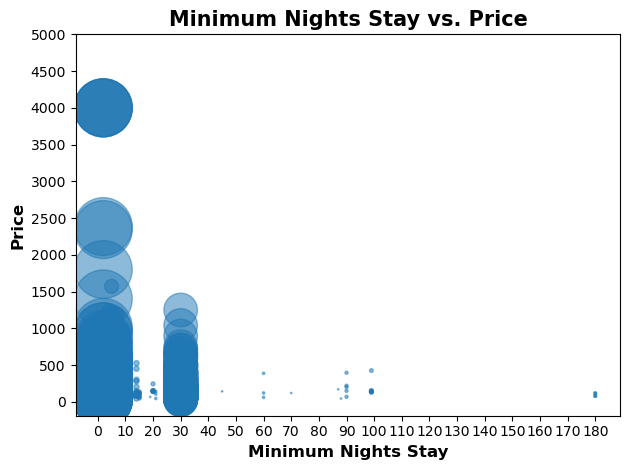

In [64]:
# Count the number of properties with each minimum nights stay value
value_counts = clean_data['minimum_nights'].value_counts()

# Set the size of the dots based on the number of properties with the same value
sizes = [value_counts[nights] for nights in clean_data['minimum_nights']]

plt.scatter(clean_data['minimum_nights'], clean_data['price'], s = sizes, alpha = 0.5)
plt.xlabel('Minimum Nights Stay', fontweight = 'bold', fontsize = 12)
plt.ylabel('Price', fontweight = 'bold', fontsize = 12)
plt.title('Minimum Nights Stay vs. Price', fontweight = 'bold', fontsize = 15)
plt.xticks(range(0, 181, 10))
plt.yticks(range(0, 5001, 500))
plt.tight_layout()
plt.show()

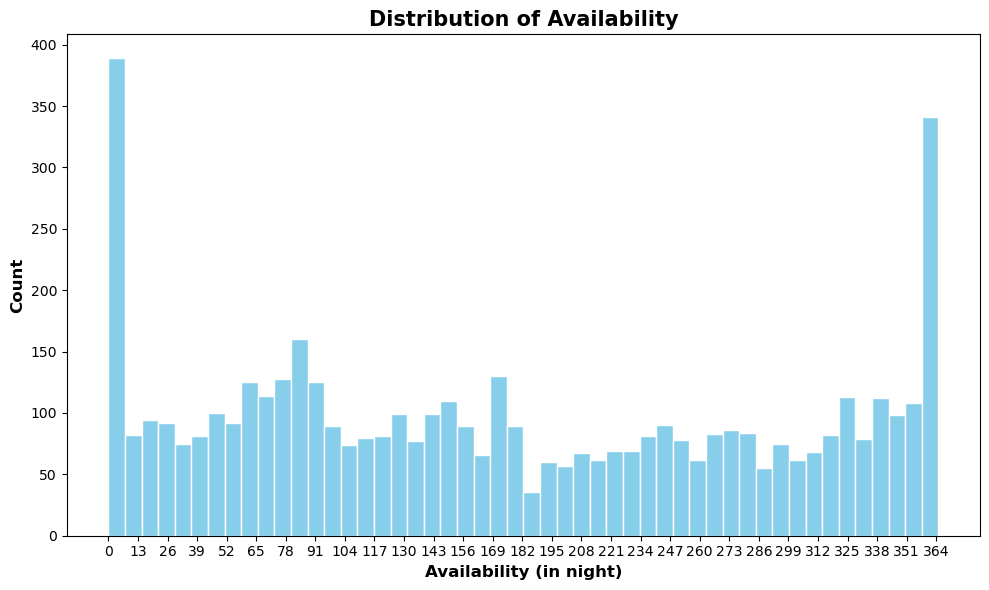

In [65]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.hist(clean_data['availability_365'], bins = 50, color = 'skyblue', edgecolor = 'white')
ax.set_xlabel('Availability (in night)', fontweight = 'bold', fontsize = 12)
ax.set_ylabel('Count', fontweight = 'bold', fontsize = 12)
ax.set_title('Distribution of Availability', fontweight = 'bold', fontsize = 15)
plt.tight_layout()
ax.set_xticks(range(0, 365, 13))
plt.tight_layout()
plt.show()

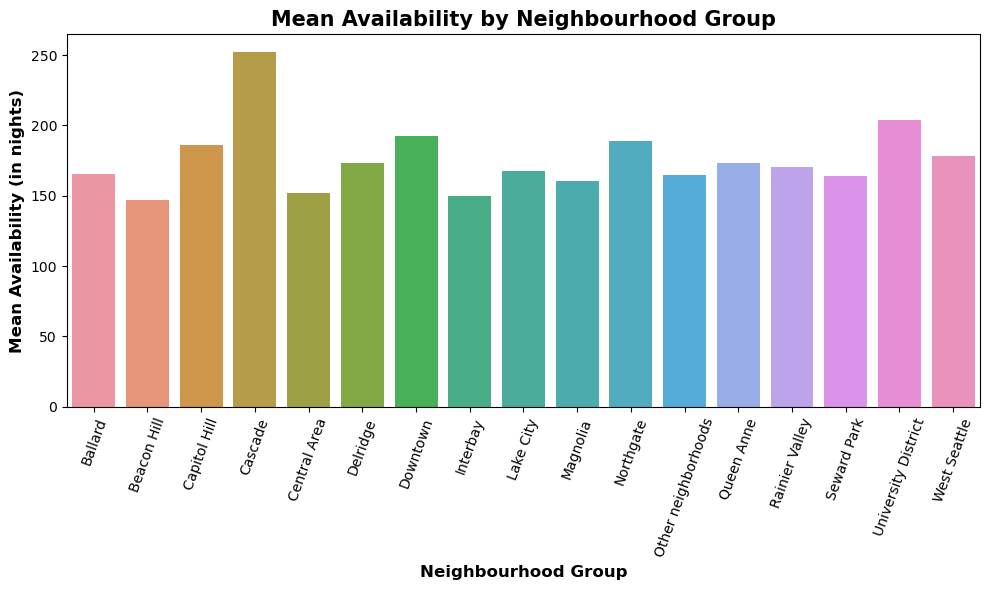

In [66]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(x = grouped_data.index, y = grouped_data.values)
ax.set_xlabel('Neighbourhood Group', fontweight = 'bold', fontsize = 12)
ax.set_ylabel('Mean Availability (in nights)', fontweight = 'bold', fontsize = 12)
ax.set_title('Mean Availability by Neighbourhood Group', fontweight = 'bold', fontsize = 15)
plt.xticks(rotation = 70)
plt.tight_layout()
plt.show()

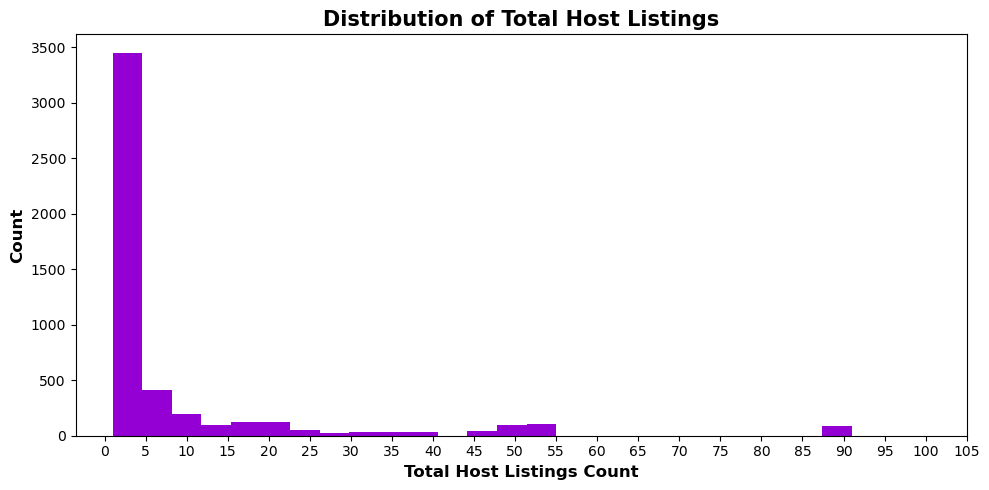

In [67]:
plt.figure(figsize = (10, 5))
plt.hist(clean_data['total_of_host_listings_count'], bins = 25, color = 'darkviolet')
plt.xlabel('Total Host Listings Count', fontweight = 'bold', fontsize = 12)
plt.ylabel('Count', fontweight = 'bold', fontsize = 12)
plt.title('Distribution of Total Host Listings', fontweight = 'bold', fontsize = 15)
plt.xticks(range(0, 110, 5))
plt.tight_layout()
plt.show()

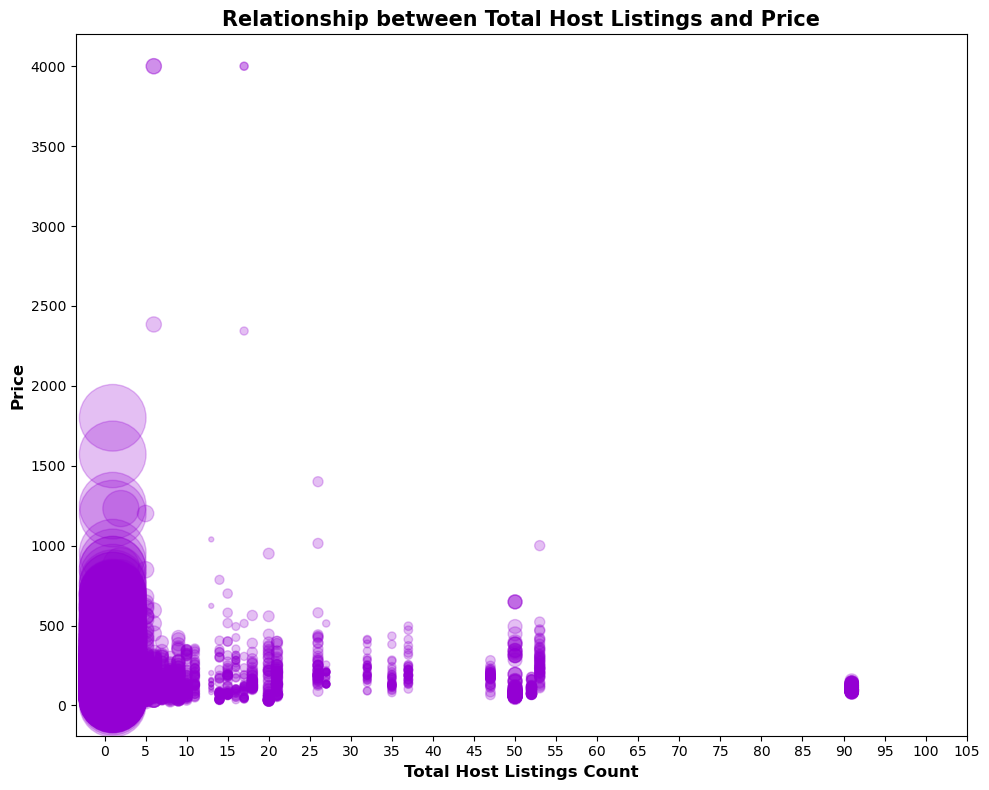

In [68]:
value_counts = clean_data['total_of_host_listings_count'].value_counts()
sizes = [value_counts[count] for count in clean_data['total_of_host_listings_count']]

plt.figure(figsize = (10, 8))
plt.scatter(clean_data['total_of_host_listings_count'], clean_data['price'], color = 'darkviolet', s = sizes, alpha = 0.25)
plt.xlabel('Total Host Listings Count', fontweight = 'bold', fontsize = 12)
plt.ylabel('Price', fontweight = 'bold', fontsize = 12)
plt.title('Relationship between Total Host Listings and Price', fontweight = 'bold', fontsize = 15)
plt.xticks(range(0, 110, 5))
plt.tight_layout()
plt.show()